# Exploratory Data Analysis

Source: https://www.kaggle.com/datasets/akashnath29/lung-cancer-dataset

# Data Pre-Proccessing

In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('lunc_cancer_dataset.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


We see here that we have binary features that are on the scale of (1,2) instead of the standard (0,1).  Let's change this scale so that we don't get confused later on in this experiment.

In [7]:
# Automatically identify binary columns (containing only 1 and 2)
binary_columns = [col for col in data.columns if data[col].isin([1, 2]).all()]

# Replace 1 with 0 and 2 with 1 in the identified binary columns
data[binary_columns] = data[binary_columns].replace({1: 0, 2: 1})

data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,0,0,0,1,1,0,1,1,1,1,1,1,0,NO
1,F,55,0,1,1,0,0,1,1,1,0,0,0,1,1,NO
2,F,78,1,1,0,0,0,1,0,1,0,0,1,0,0,YES
3,M,60,1,0,0,0,1,0,1,0,0,1,0,1,1,YES
4,F,80,0,0,1,0,0,1,0,1,0,0,0,0,1,NO


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

# Dataset Composition
The Lung Cancer Dataset includes a diverse array of symptoms essential for comprehensive analysis and model development. The primary categories of data are as follows:

1. Patient Demographics
Age: Provides the age at diagnosis, enabling analysis of age-related incidence and outcomes.
Gender: Includes information on patient gender, facilitating gender-based studies.
Smoking Status: Categorized as current smoker, former smoker, or non-smoker, this data is critical for evaluating the impact of smoking on lung cancer risk and progression.

2. Medical History
Comorbidities: Details additional health issues such as chronic obstructive pulmonary disease (COPD), which are relevant for treatment planning and prognosis.

3. Clinical Data
Vital Signs: Records of blood pressure, heart rate, respiratory rate, and other vital signs at diagnosis and during treatment.

# Feature Definitions
- GENDER - the gender of the subject
- AGE - the age of the subject in years
- SMOKING - binary value for if the subject smokes or not
- YELLOW_FINGERS - binary value for Raynaud's phenomenon (RP) is a disorder resulting in vasospasm, a particular series of discolorations of the fingers and/or the toes after exposure to changes in temperature (cold or hot) or emotional events. Most people with RP have a sensitivity to cold.
- ANXIETY - binary value for if subject experiences anxiety
- PEER_PRESSURE - binary value for if subject experiences peer pressure
- CHRONIC_DISEASE - binary value for if subject suffers from some chronic disease
- FATIGUE - binary value for if subject experiences fatigue
- ALLERGY - binary value for if subject suffers from allergies
- WHEEZING - binary value for if subject experiences wheezing
- ALCHOHOL_CONSUMING - binary value for if subject consumes alchohol
- COUGHING - binary value for if subject suffers from a chough
- SHORTNESS_OF_BREATH - binary value for if subject suffers from shortness of breath
- SWALLOWING_DIFFICULTY - binary value for if subject experiences difficulty swallowing
- CHEST_PAIN - binary value for if subject suffers from chest pain
- LUNG_CANCER - binary value for if the subject has lung cancer 

# Questions of Interest
- What combinations of demographic features and health issues result in higher than nominal chances of the subject having lung cancer?
- Which health condition from the features set has the most impact on a subject having breast cancer?
- At what age is someone more likely to develop breast cancer?
- For the binary features do we have even splits across the dataset of true and false values?

# EDA: Single Variable Analysis

## Gender
Represents the gender of the subject.

In [8]:
data.GENDER.value_counts()

GENDER
M    1514
F    1486
Name: count, dtype: int64

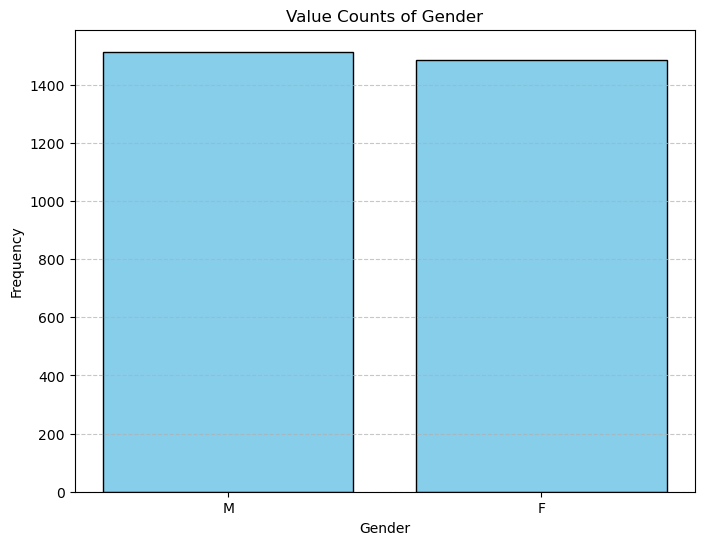

In [11]:
import matplotlib.pyplot as plt

geneder_value_counts = data.GENDER.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(geneder_value_counts.index, geneder_value_counts.values, edgecolor='black', color='skyblue')
plt.title('Value Counts of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(geneder_value_counts.index)  # Ensure the x-ticks match the value counts
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

There are slightly more males than females in the dataset but the sample size for each gender is roughly the same size.  There are 1514 males and 1486 females in the dataset.

## Age
Represents the age of the subject in years.

In [14]:
data.AGE.describe()

count    3000.000000
mean       55.169000
std        14.723746
min        30.000000
25%        42.000000
50%        55.000000
75%        68.000000
max        80.000000
Name: AGE, dtype: float64

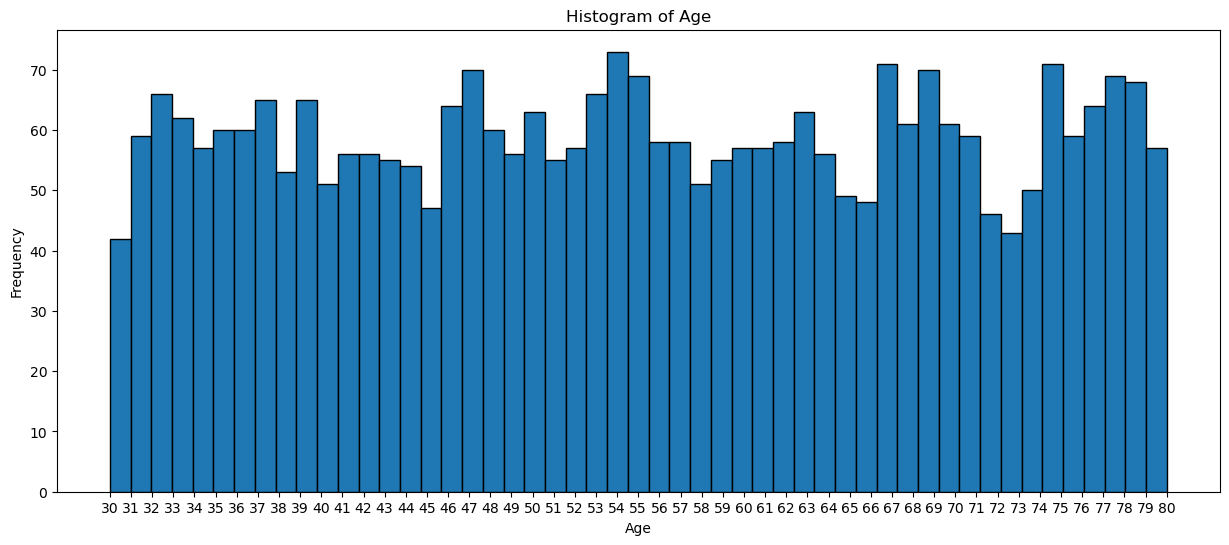

In [13]:
import numpy as np

data_age_range = data.AGE.max() - data.AGE.min() + 1

plt.figure(figsize=(15, 6))
plt.hist(data.AGE, bins=int(data_age_range), edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(np.arange(min(data.AGE), max(data.AGE) + 1, 1))
plt.show()

The ages of the subjects is roughly evenly distributed ranging from 30 to 80 years of age.  There is a mean age of 55 and there are peaks in the age distribution at 47, 54, 67, 69, and 75.

## Smoking
Represents binary value for if the subject smokes or not.

In [15]:
data.SMOKING.value_counts()

SMOKING
0    1527
1    1473
Name: count, dtype: int64

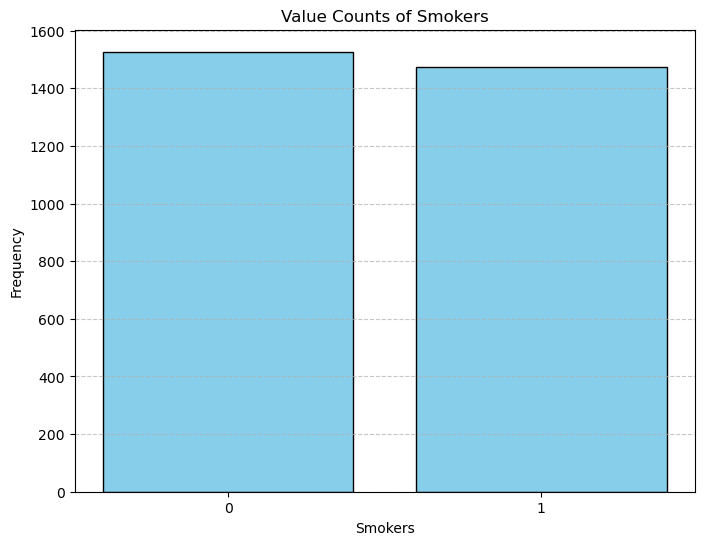

In [16]:
smoking_value_counts = data.SMOKING.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(smoking_value_counts.index, smoking_value_counts.values, edgecolor='black', color='skyblue')
plt.title('Value Counts of Smokers')
plt.xlabel('Smokers')
plt.ylabel('Frequency')
plt.xticks(smoking_value_counts.index)  # Ensure the x-ticks match the value counts
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

There are slightly more non-smokers than smokers in the dataset but the sample size for each demographic is roughly the same size.  There are 1527 non-smokers and 1473 smokers in the dataset.

## Yellow Fingers
Represents binary value for Raynaud's phenomenon (RP) is a disorder resulting in vasospasm, a particular series of discolorations of the fingers and/or the toes after exposure to changes in temperature (cold or hot) or emotional events. Most people with RP have a sensitivity to cold.

In [17]:
data.YELLOW_FINGERS.value_counts()

YELLOW_FINGERS
1    1542
0    1458
Name: count, dtype: int64

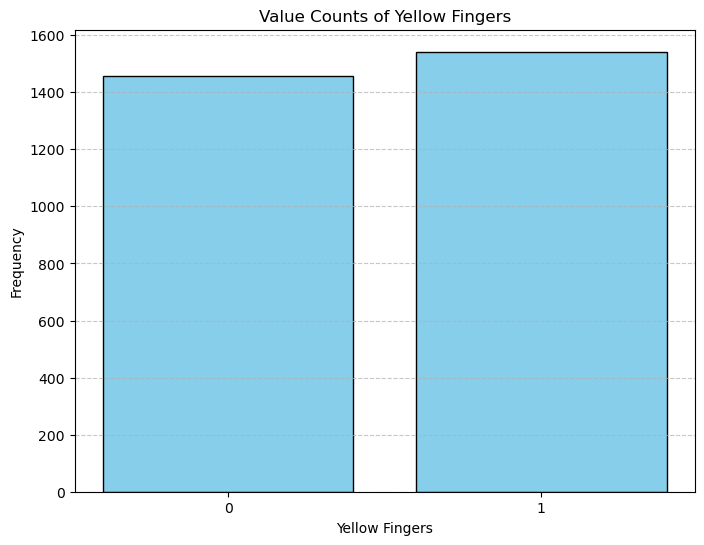

In [18]:
yellow_fing_value_counts = data.YELLOW_FINGERS.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(yellow_fing_value_counts.index, yellow_fing_value_counts.values, edgecolor='black', color='skyblue')
plt.title('Value Counts of Yellow Fingers')
plt.xlabel('Yellow Fingers')
plt.ylabel('Frequency')
plt.xticks(yellow_fing_value_counts.index)  # Ensure the x-ticks match the value counts
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

There are slightly more subjects with yellow fingers than subjects without in the dataset.  There are 1542 subjects who have yellow fingers and 1458 subjects who don't have yellow fever.

## Anxiety
Represents binary value for if subject experiences anxiety.

In [19]:
data.ANXIETY.value_counts()

ANXIETY
0    1518
1    1482
Name: count, dtype: int64

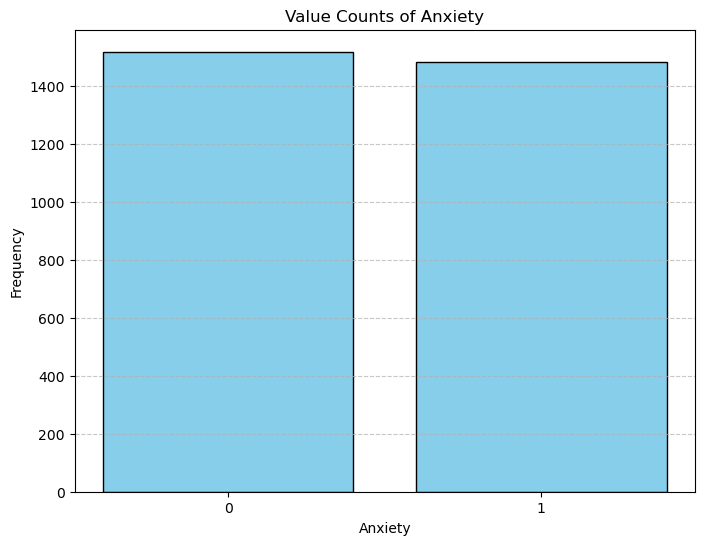

In [20]:
anxiety_value_counts = data.ANXIETY.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(anxiety_value_counts.index, anxiety_value_counts.values, edgecolor='black', color='skyblue')
plt.title('Value Counts of Anxiety')
plt.xlabel('Anxiety')
plt.ylabel('Frequency')
plt.xticks(anxiety_value_counts.index)  # Ensure the x-ticks match the value counts
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

There are slightly more subjects without anxiety than subjects with anxiety in the dataset but the sample size for each demographic is roughly the same size.  There are 1518 subjects without anxiety and 1482 subjects with anxiety in the dataset.

## Peer Pressure
Represents binary value for if subject experiences peer pressure.

In [21]:
data.PEER_PRESSURE.value_counts()

PEER_PRESSURE
0    1503
1    1497
Name: count, dtype: int64

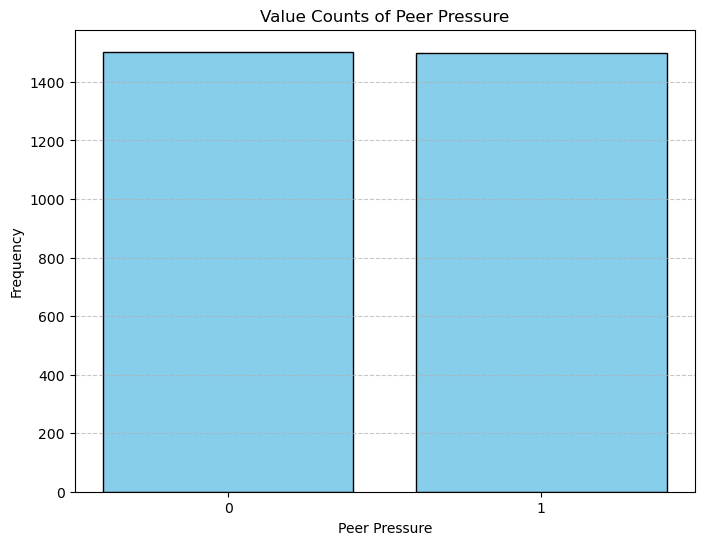

In [22]:
pp_value_counts = data.PEER_PRESSURE.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(pp_value_counts.index, pp_value_counts.values, edgecolor='black', color='skyblue')
plt.title('Value Counts of Peer Pressure')
plt.xlabel('Peer Pressure')
plt.ylabel('Frequency')
plt.xticks(pp_value_counts.index)  # Ensure the x-ticks match the value counts
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

There are slightly more subjects who dont experience peer pressure than there are subjects who do but the sample size for each demographic is roughly the same size.  There are 1503 subjects who don't experience peer pressure and 1497 subjects who do experience peer pressure in the dataset.

## Chronic Disease
Represents binary value for if subject suffers from some chronic disease.

In [23]:
data.CHRONIC_DISEASE.value_counts()

CHRONIC_DISEASE
1    1529
0    1471
Name: count, dtype: int64

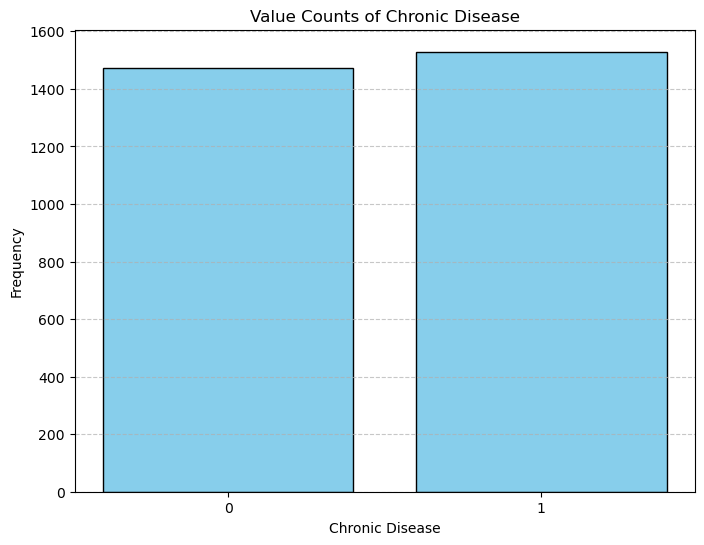

In [24]:
chronic_value_counts = data.CHRONIC_DISEASE.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(chronic_value_counts.index, chronic_value_counts.values, edgecolor='black', color='skyblue')
plt.title('Value Counts of Chronic Disease')
plt.xlabel('Chronic Disease')
plt.ylabel('Frequency')
plt.xticks(chronic_value_counts.index)  # Ensure the x-ticks match the value counts
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

There are slightly more subjects who suffer from a chronic disease than there are subjects who do not but the sample size for each demographic is roughly the same size.  There are 1519 subjects who suffer from a chronic disease and 1471 subjects who do not suffer from a chronic disease in the dataset.

## Fatigue
Represents binary value for if subject experiences fatigue.

In [25]:
data.FATIGUE.value_counts()

FATIGUE
0    1531
1    1469
Name: count, dtype: int64

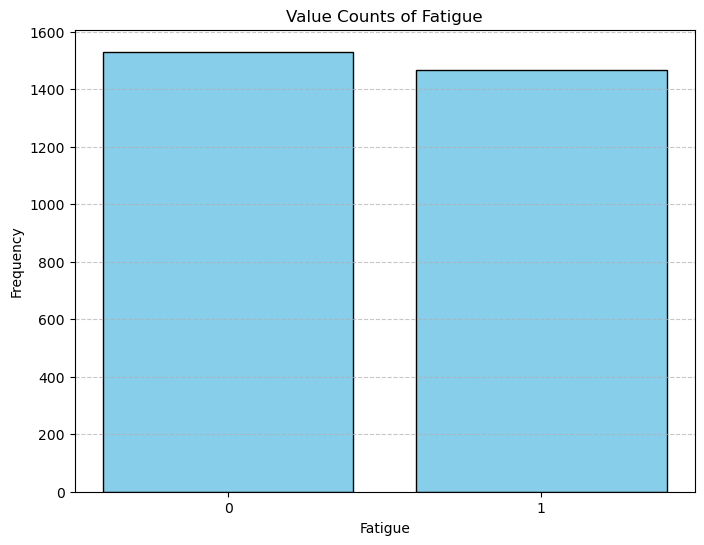

In [26]:
fatigue_value_counts = data.FATIGUE.value_counts()

plt.figure(figsize=(8, 6))
plt.bar(fatigue_value_counts.index, fatigue_value_counts.values, edgecolor='black', color='skyblue')
plt.title('Value Counts of Fatigue')
plt.xlabel('Fatigue')
plt.ylabel('Frequency')
plt.xticks(fatigue_value_counts.index)  # Ensure the x-ticks match the value counts
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

There are slightly more subjects who do not suffer from a fatigue than there are subjects who do but the sample size for each demographic is roughly the same size.  There are 1531 subjects who do not suffer from fatigue and 1469 subjects who do in the dataset.

# EDA: Multi-variable Analysis
In this section we will analyze the relationship of the features against the target feature (LUNG_CANCER).

## Gender vs Lung Cancer

In [28]:
lung_cancer = data[data['LUNG_CANCER'] == 'YES']
no_lung_cancer = data[data['LUNG_CANCER'] == 'NO']

In [29]:
lung_cancer.GENDER.value_counts()

GENDER
F    764
M    754
Name: count, dtype: int64

In [30]:
no_lung_cancer.GENDER.value_counts()

GENDER
M    760
F    722
Name: count, dtype: int64

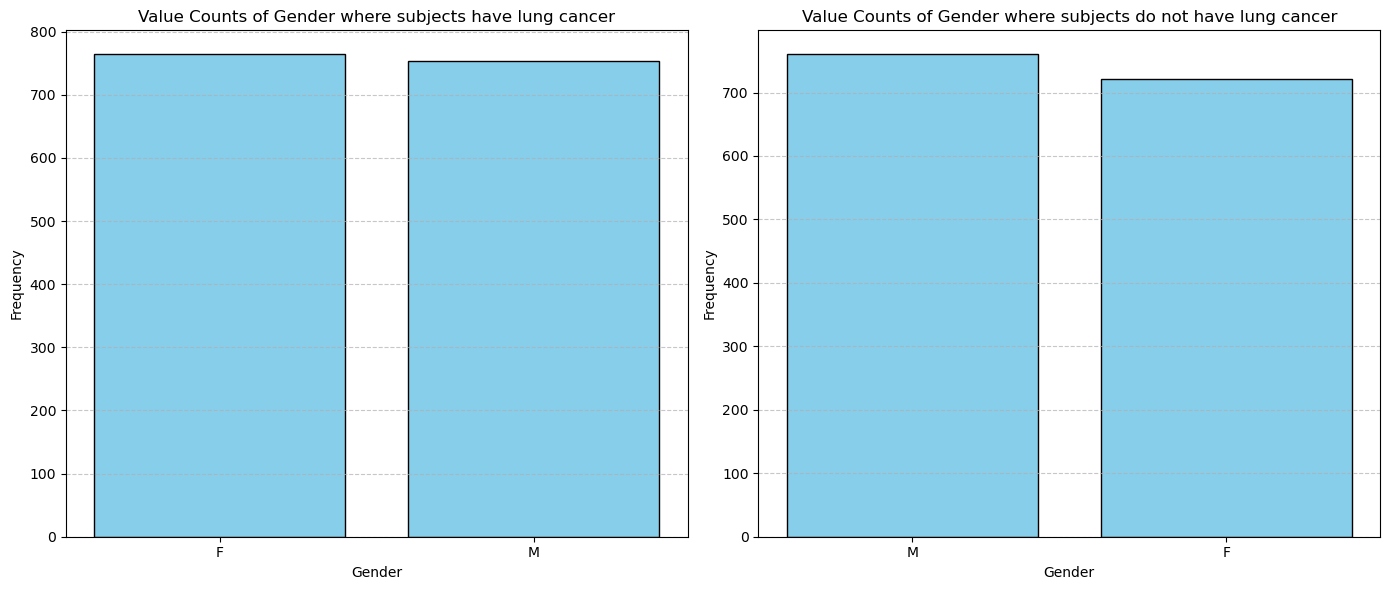

In [38]:
cancer_value_counts = lung_cancer.GENDER.value_counts()
no_cancer_value_counts = no_lung_cancer.GENDER.value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(cancer_value_counts.index, cancer_value_counts.values, edgecolor='black', color='skyblue')
axes[0].set_title('Value Counts of Gender where subjects have lung cancer')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(cancer_value_counts.index)  # Ensure the x-ticks match the value counts
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(no_cancer_value_counts.index, no_cancer_value_counts.values, edgecolor='black', color='skyblue')
axes[1].set_title('Value Counts of Gender where subjects do not have lung cancer')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(no_cancer_value_counts.index)  # Ensure the x-ticks match the value counts
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

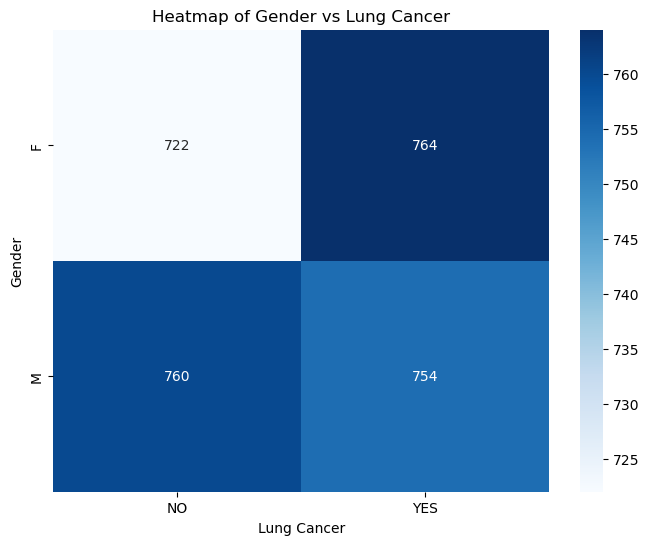

In [72]:
import seaborn as sns

gender_cancer_table = pd.crosstab(data['GENDER'], data['LUNG_CANCER'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(gender_cancer_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Gender vs Lung Cancer')
plt.xlabel('Lung Cancer')
plt.ylabel('Gender')
plt.show()

## Age vs Lung Cancer

In [40]:
lung_cancer.AGE.describe()

count    1518.000000
mean       54.649539
std        14.903105
min        30.000000
25%        41.000000
50%        54.000000
75%        67.750000
max        80.000000
Name: AGE, dtype: float64

In [41]:
no_lung_cancer.AGE.describe()

count    1482.000000
mean       55.701080
std        14.523505
min        30.000000
25%        44.000000
50%        56.000000
75%        68.000000
max        80.000000
Name: AGE, dtype: float64

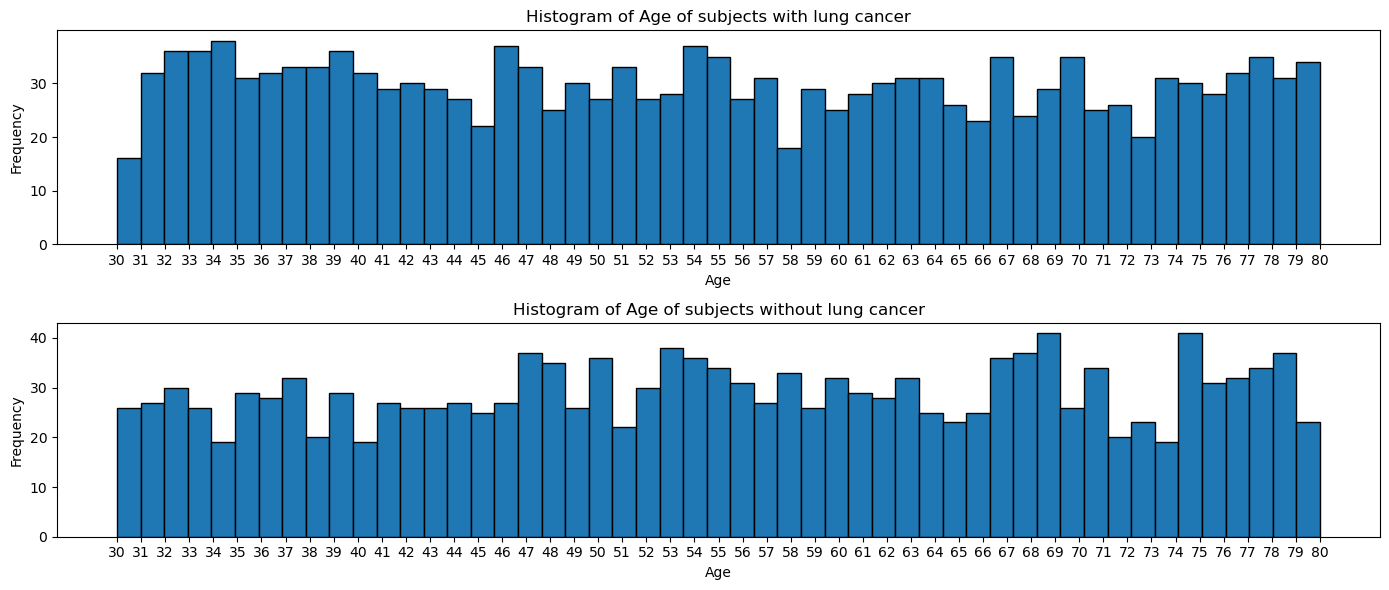

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 6))

data_age_range_cancer = lung_cancer.AGE.max() - lung_cancer.AGE.min() + 1
axes[0].hist(lung_cancer.AGE, bins=int(data_age_range_cancer), edgecolor='black')
axes[0].set_title('Histogram of Age of subjects with lung cancer')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(np.arange(min(lung_cancer.AGE), max(lung_cancer.AGE) + 1, 1))

data_age_range_no_cancer = no_lung_cancer.AGE.max() - no_lung_cancer.AGE.min() + 1
axes[1].hist(no_lung_cancer.AGE, bins=int(data_age_range_no_cancer), edgecolor='black')
axes[1].set_title('Histogram of Age of subjects without lung cancer')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(np.arange(min(no_lung_cancer.AGE), max(no_lung_cancer.AGE) + 1, 1))

plt.tight_layout()
plt.show()

## Smoking vs Lung Cancer

In [44]:
lung_cancer.SMOKING.value_counts()

SMOKING
0    762
1    756
Name: count, dtype: int64

In [45]:
no_lung_cancer.SMOKING.value_counts()

SMOKING
0    765
1    717
Name: count, dtype: int64

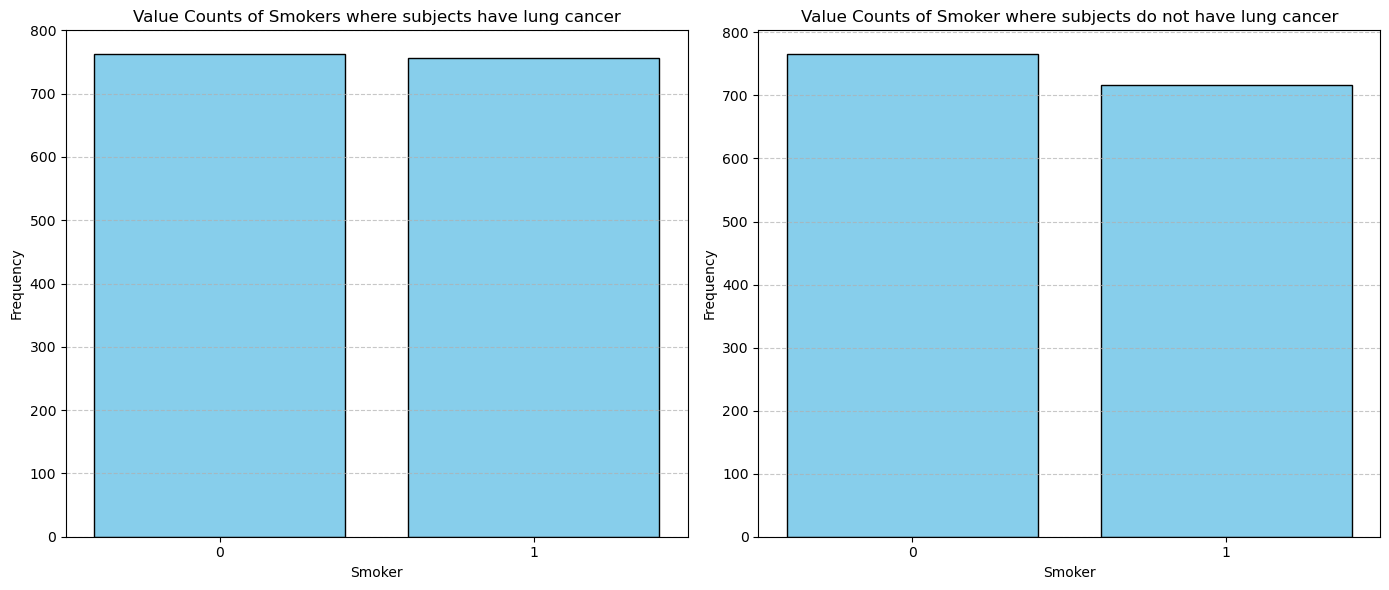

In [47]:
cancer_smoker_value_counts = lung_cancer.SMOKING.value_counts()
no_cancer_smoker_value_counts = no_lung_cancer.SMOKING.value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(cancer_smoker_value_counts.index, cancer_smoker_value_counts.values, edgecolor='black', color='skyblue')
axes[0].set_title('Value Counts of Smokers where subjects have lung cancer')
axes[0].set_xlabel('Smoker')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(cancer_smoker_value_counts.index)  # Ensure the x-ticks match the value counts
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(no_cancer_smoker_value_counts.index, no_cancer_smoker_value_counts.values, edgecolor='black', color='skyblue')
axes[1].set_title('Value Counts of Smoker where subjects do not have lung cancer')
axes[1].set_xlabel('Smoker')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(no_cancer_smoker_value_counts.index)  # Ensure the x-ticks match the value counts
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

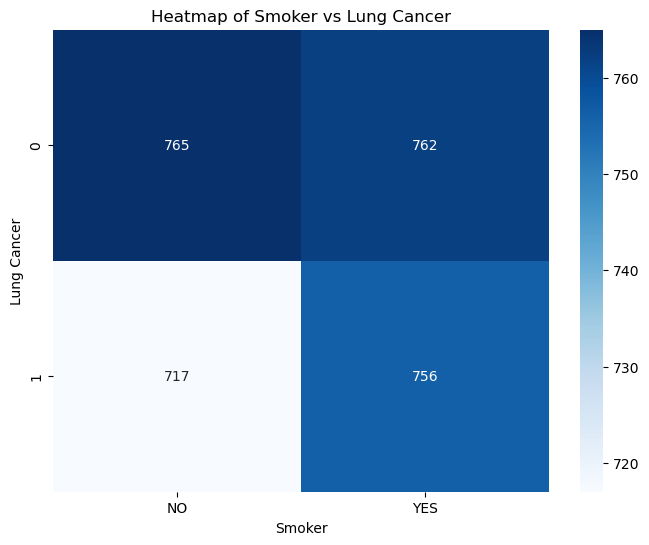

In [50]:
smoker_cancer_table = pd.crosstab(data['SMOKING'], data['LUNG_CANCER'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(smoker_cancer_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Smoker vs Lung Cancer')
plt.xlabel('Smoker')
plt.ylabel('Lung Cancer')
plt.show()

## Yellow Fingers vs Lung Cancer

In [51]:
lung_cancer.YELLOW_FINGERS.value_counts()

YELLOW_FINGERS
1    790
0    728
Name: count, dtype: int64

In [52]:
no_lung_cancer.YELLOW_FINGERS.value_counts()

YELLOW_FINGERS
1    752
0    730
Name: count, dtype: int64

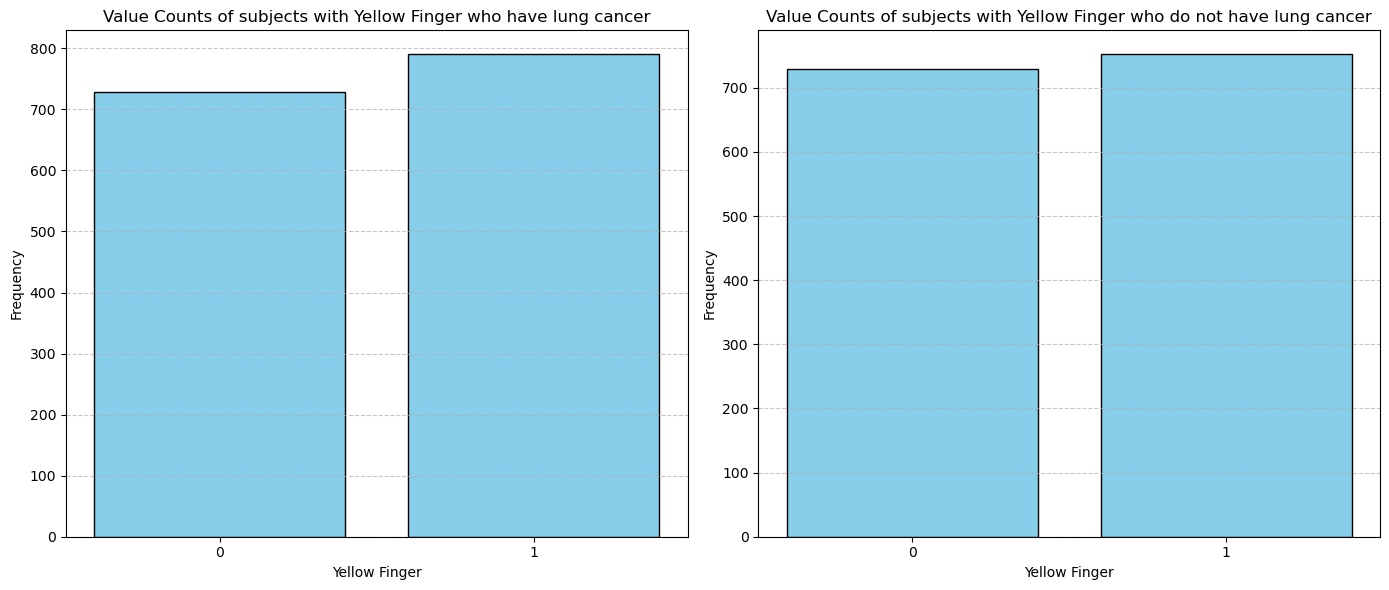

In [53]:
cancer_yell_fin_value_counts = lung_cancer.YELLOW_FINGERS.value_counts()
no_cancer_yell_fin_value_counts = no_lung_cancer.YELLOW_FINGERS.value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(cancer_yell_fin_value_counts.index, cancer_yell_fin_value_counts.values, edgecolor='black', color='skyblue')
axes[0].set_title('Value Counts of subjects with Yellow Finger who have lung cancer')
axes[0].set_xlabel('Yellow Finger')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(cancer_yell_fin_value_counts.index)  # Ensure the x-ticks match the value counts
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(no_cancer_yell_fin_value_counts.index, no_cancer_yell_fin_value_counts.values, edgecolor='black', color='skyblue')
axes[1].set_title('Value Counts of subjects with Yellow Finger who do not have lung cancer')
axes[1].set_xlabel('Yellow Finger')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(no_cancer_yell_fin_value_counts.index)  # Ensure the x-ticks match the value counts
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

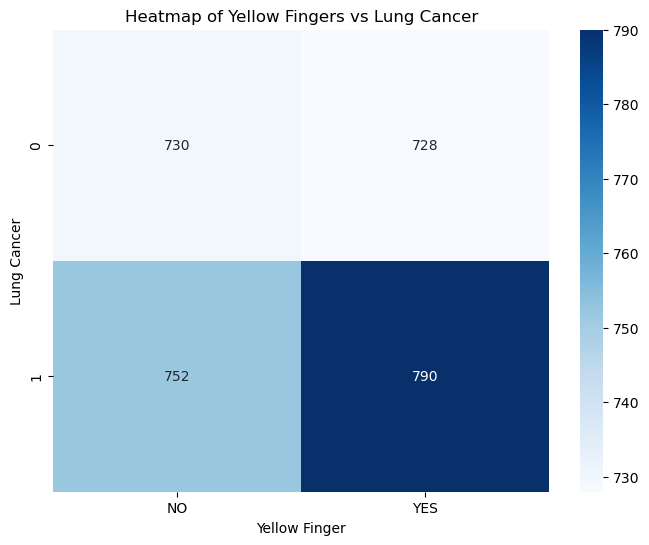

In [54]:
yell_fin_cancer_table = pd.crosstab(data['YELLOW_FINGERS'], data['LUNG_CANCER'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(yell_fin_cancer_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Yellow Fingers vs Lung Cancer')
plt.xlabel('Yellow Finger')
plt.ylabel('Lung Cancer')
plt.show()

## Anxiety vs Lung Cancer

In [56]:
lung_cancer.ANXIETY.value_counts()

ANXIETY
0    779
1    739
Name: count, dtype: int64

In [57]:
no_lung_cancer.ANXIETY.value_counts()

ANXIETY
1    743
0    739
Name: count, dtype: int64

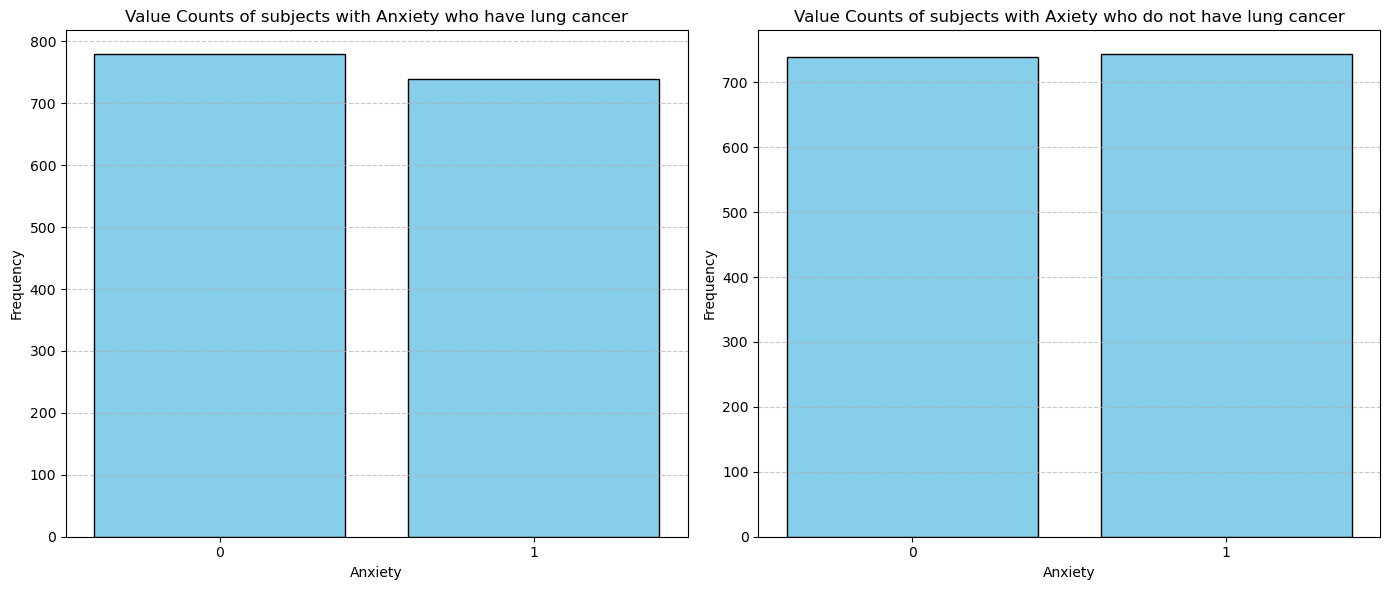

In [58]:
cancer_anxiety_value_counts = lung_cancer.ANXIETY.value_counts()
no_cancer_anxiety_value_counts = no_lung_cancer.ANXIETY.value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(cancer_anxiety_value_counts.index, cancer_anxiety_value_counts.values, edgecolor='black', color='skyblue')
axes[0].set_title('Value Counts of subjects with Anxiety who have lung cancer')
axes[0].set_xlabel('Anxiety')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(cancer_anxiety_value_counts.index)  # Ensure the x-ticks match the value counts
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(no_cancer_anxiety_value_counts.index, no_cancer_anxiety_value_counts.values, edgecolor='black', color='skyblue')
axes[1].set_title('Value Counts of subjects with Axiety who do not have lung cancer')
axes[1].set_xlabel('Anxiety')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(no_cancer_anxiety_value_counts.index)  # Ensure the x-ticks match the value counts
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

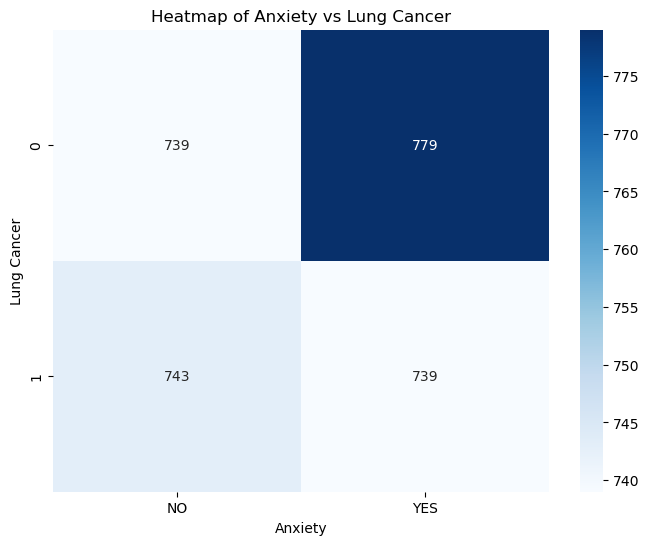

In [59]:
anxiety_cancer_table = pd.crosstab(data['ANXIETY'], data['LUNG_CANCER'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(anxiety_cancer_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Anxiety vs Lung Cancer')
plt.xlabel('Anxiety')
plt.ylabel('Lung Cancer')
plt.show()

## Peer Pressure vs Lung Cancer

In [60]:
lung_cancer.PEER_PRESSURE.value_counts()

PEER_PRESSURE
0    779
1    739
Name: count, dtype: int64

In [61]:
no_lung_cancer.PEER_PRESSURE.value_counts()

PEER_PRESSURE
1    758
0    724
Name: count, dtype: int64

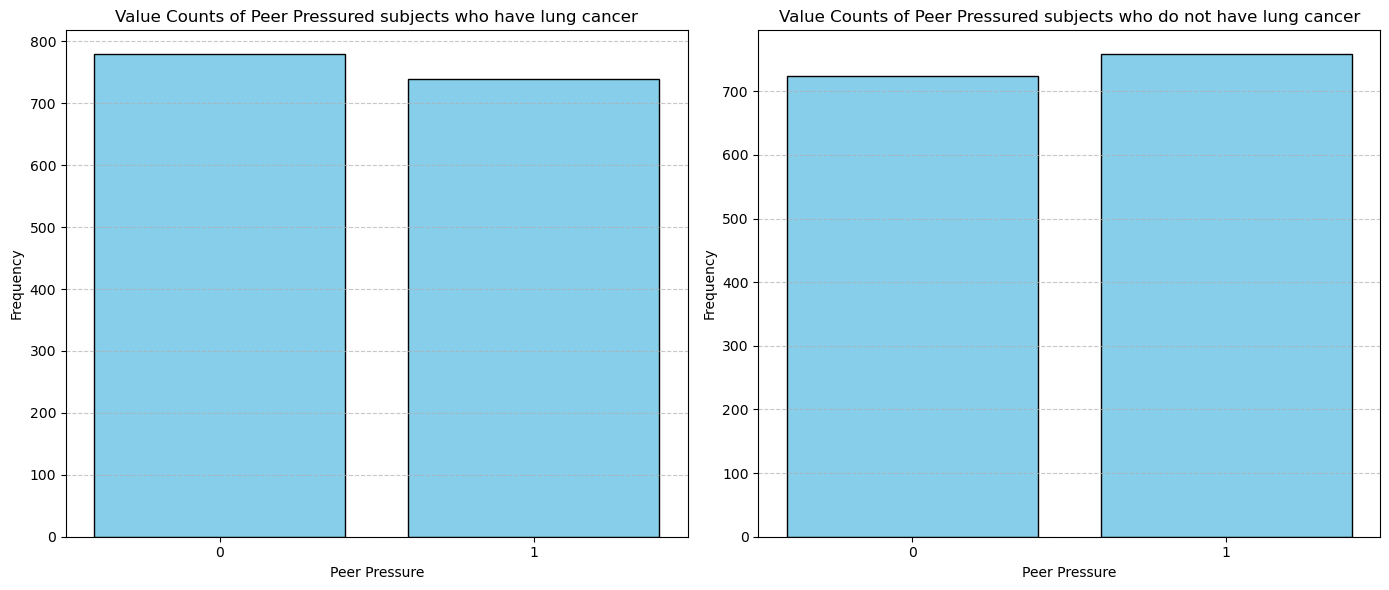

In [62]:
cancer_pp_value_counts = lung_cancer.PEER_PRESSURE.value_counts()
no_cancer_pp_value_counts = no_lung_cancer.PEER_PRESSURE.value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(cancer_pp_value_counts.index, cancer_pp_value_counts.values, edgecolor='black', color='skyblue')
axes[0].set_title('Value Counts of Peer Pressured subjects who have lung cancer')
axes[0].set_xlabel('Peer Pressure')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(cancer_pp_value_counts.index)  # Ensure the x-ticks match the value counts
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(no_cancer_pp_value_counts.index, no_cancer_pp_value_counts.values, edgecolor='black', color='skyblue')
axes[1].set_title('Value Counts of Peer Pressured subjects who do not have lung cancer')
axes[1].set_xlabel('Peer Pressure')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(no_cancer_pp_value_counts.index)  # Ensure the x-ticks match the value counts
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

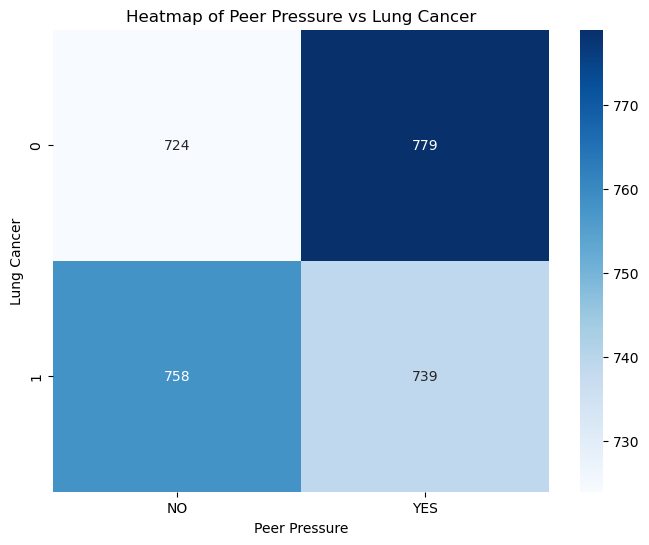

In [63]:
pp_cancer_table = pd.crosstab(data['PEER_PRESSURE'], data['LUNG_CANCER'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pp_cancer_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Peer Pressure vs Lung Cancer')
plt.xlabel('Peer Pressure')
plt.ylabel('Lung Cancer')
plt.show()

## Chronic Disease vs Lung Cnacer

In [64]:
lung_cancer.CHRONIC_DISEASE.value_counts()

CHRONIC_DISEASE
1    766
0    752
Name: count, dtype: int64

In [65]:
no_lung_cancer.CHRONIC_DISEASE.value_counts()

CHRONIC_DISEASE
1    763
0    719
Name: count, dtype: int64

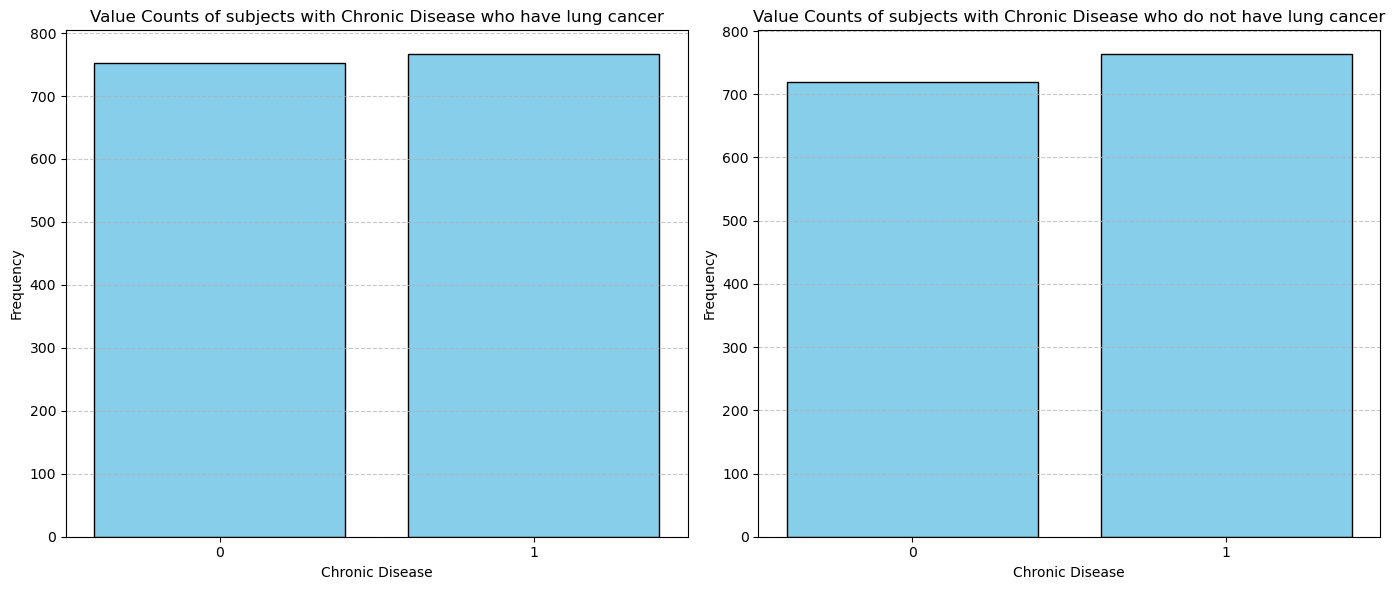

In [66]:
cancer_chronic_value_counts = lung_cancer.CHRONIC_DISEASE.value_counts()
no_cancer_chronic_value_counts = no_lung_cancer.CHRONIC_DISEASE.value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(cancer_chronic_value_counts.index, cancer_chronic_value_counts.values, edgecolor='black', color='skyblue')
axes[0].set_title('Value Counts of subjects with Chronic Disease who have lung cancer')
axes[0].set_xlabel('Chronic Disease')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(cancer_chronic_value_counts.index)  # Ensure the x-ticks match the value counts
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(no_cancer_chronic_value_counts.index, no_cancer_chronic_value_counts.values, edgecolor='black', color='skyblue')
axes[1].set_title('Value Counts of subjects with Chronic Disease who do not have lung cancer')
axes[1].set_xlabel('Chronic Disease')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(no_cancer_chronic_value_counts.index)  # Ensure the x-ticks match the value counts
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

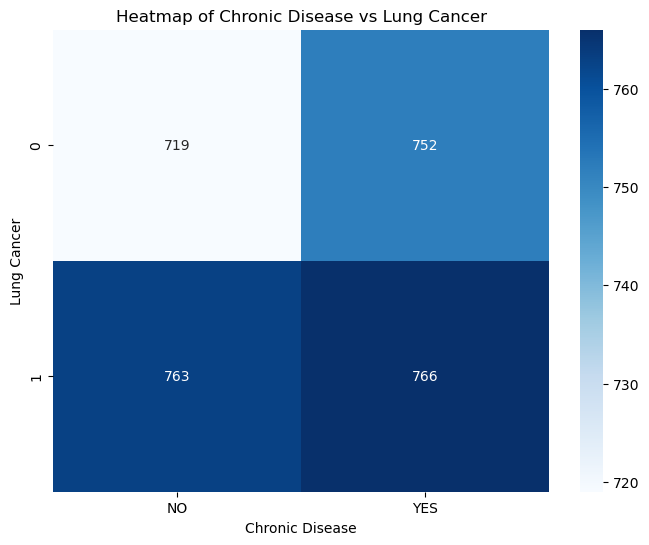

In [67]:
chronic_cancer_table = pd.crosstab(data['CHRONIC_DISEASE'], data['LUNG_CANCER'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(chronic_cancer_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Chronic Disease vs Lung Cancer')
plt.xlabel('Chronic Disease')
plt.ylabel('Lung Cancer')
plt.show()

## Fatigue vs Lung Cancer

In [68]:
lung_cancer.FATIGUE.value_counts()

FATIGUE
0    773
1    745
Name: count, dtype: int64

In [69]:
no_lung_cancer.FATIGUE.value_counts()

FATIGUE
0    758
1    724
Name: count, dtype: int64

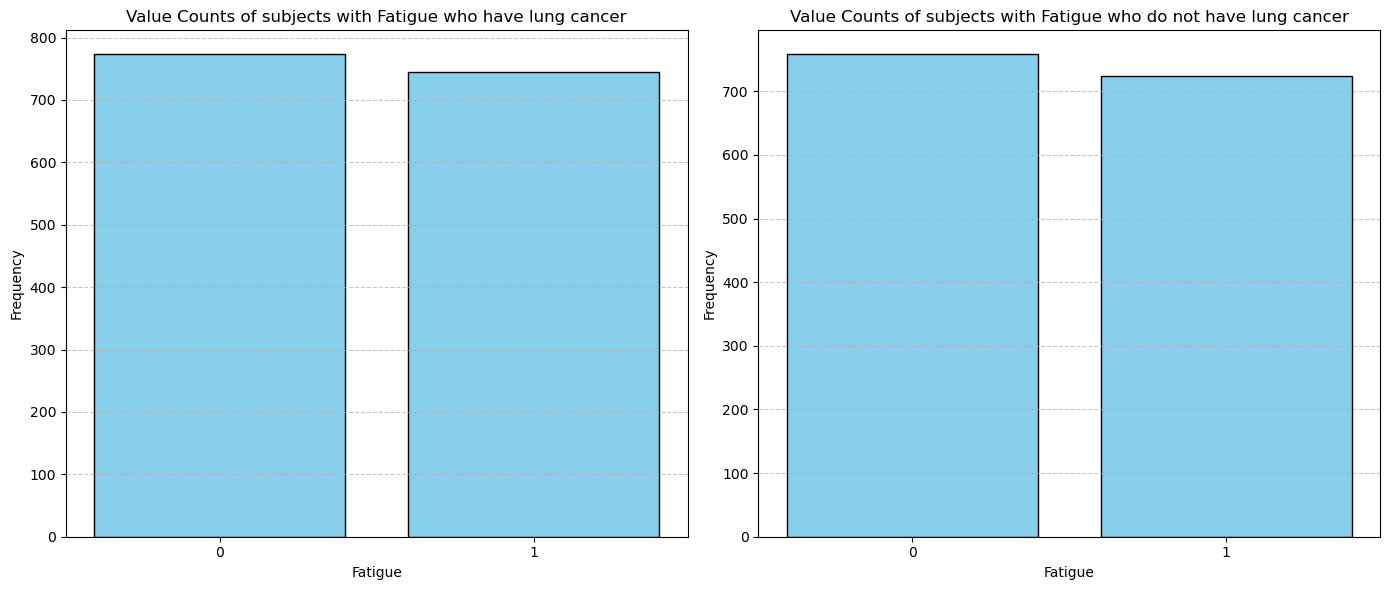

In [70]:
cancer_fatigue_value_counts = lung_cancer.FATIGUE.value_counts()
no_cancer_fatigue_value_counts = no_lung_cancer.FATIGUE.value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(cancer_fatigue_value_counts.index, cancer_fatigue_value_counts.values, edgecolor='black', color='skyblue')
axes[0].set_title('Value Counts of subjects with Fatigue who have lung cancer')
axes[0].set_xlabel('Fatigue')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(cancer_fatigue_value_counts.index)  # Ensure the x-ticks match the value counts
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(no_cancer_fatigue_value_counts.index, no_cancer_fatigue_value_counts.values, edgecolor='black', color='skyblue')
axes[1].set_title('Value Counts of subjects with Fatigue who do not have lung cancer')
axes[1].set_xlabel('Fatigue')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(no_cancer_fatigue_value_counts.index)  # Ensure the x-ticks match the value counts
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

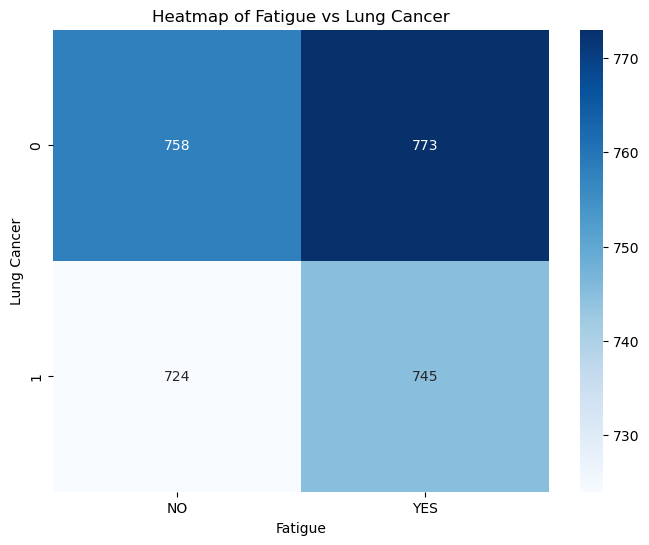

In [71]:
fatigue_cancer_table = pd.crosstab(data['FATIGUE'], data['LUNG_CANCER'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fatigue_cancer_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Fatigue vs Lung Cancer')
plt.xlabel('Fatigue')
plt.ylabel('Lung Cancer')
plt.show()

## Allergy vs Lung Cancer

In [73]:
lung_cancer.ALLERGY.value_counts()

ALLERGY
1    774
0    744
Name: count, dtype: int64

In [74]:
no_lung_cancer.ALLERGY.value_counts()

ALLERGY
1    746
0    736
Name: count, dtype: int64

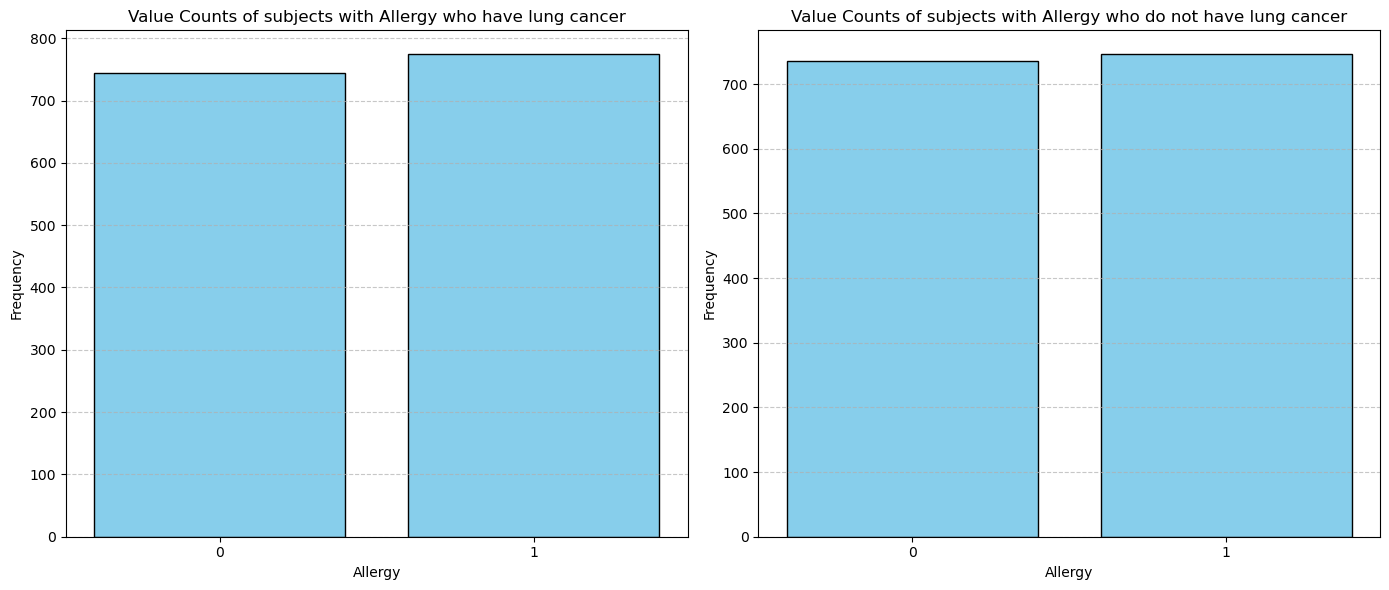

In [75]:
cancer_allergy_value_counts = lung_cancer.ALLERGY.value_counts()
no_cancer_allergy_value_counts = no_lung_cancer.ALLERGY.value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(cancer_allergy_value_counts.index, cancer_allergy_value_counts.values, edgecolor='black', color='skyblue')
axes[0].set_title('Value Counts of subjects with Allergy who have lung cancer')
axes[0].set_xlabel('Allergy')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(cancer_allergy_value_counts.index)  # Ensure the x-ticks match the value counts
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(no_cancer_allergy_value_counts.index, no_cancer_allergy_value_counts.values, edgecolor='black', color='skyblue')
axes[1].set_title('Value Counts of subjects with Allergy who do not have lung cancer')
axes[1].set_xlabel('Allergy')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(no_cancer_allergy_value_counts.index)  # Ensure the x-ticks match the value counts
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

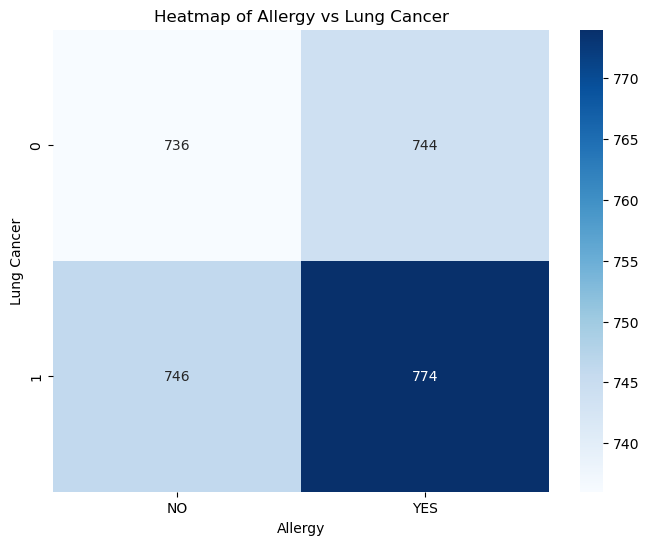

In [76]:
allergy_cancer_table = pd.crosstab(data['ALLERGY'], data['LUNG_CANCER'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(allergy_cancer_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Allergy vs Lung Cancer')
plt.xlabel('Allergy')
plt.ylabel('Lung Cancer')
plt.show()

## Wheezing vs Lung Cancer

In [77]:
lung_cancer.WHEEZING.value_counts()

WHEEZING
0    792
1    726
Name: count, dtype: int64

In [78]:
no_lung_cancer.WHEEZING.value_counts()

WHEEZING
1    766
0    716
Name: count, dtype: int64

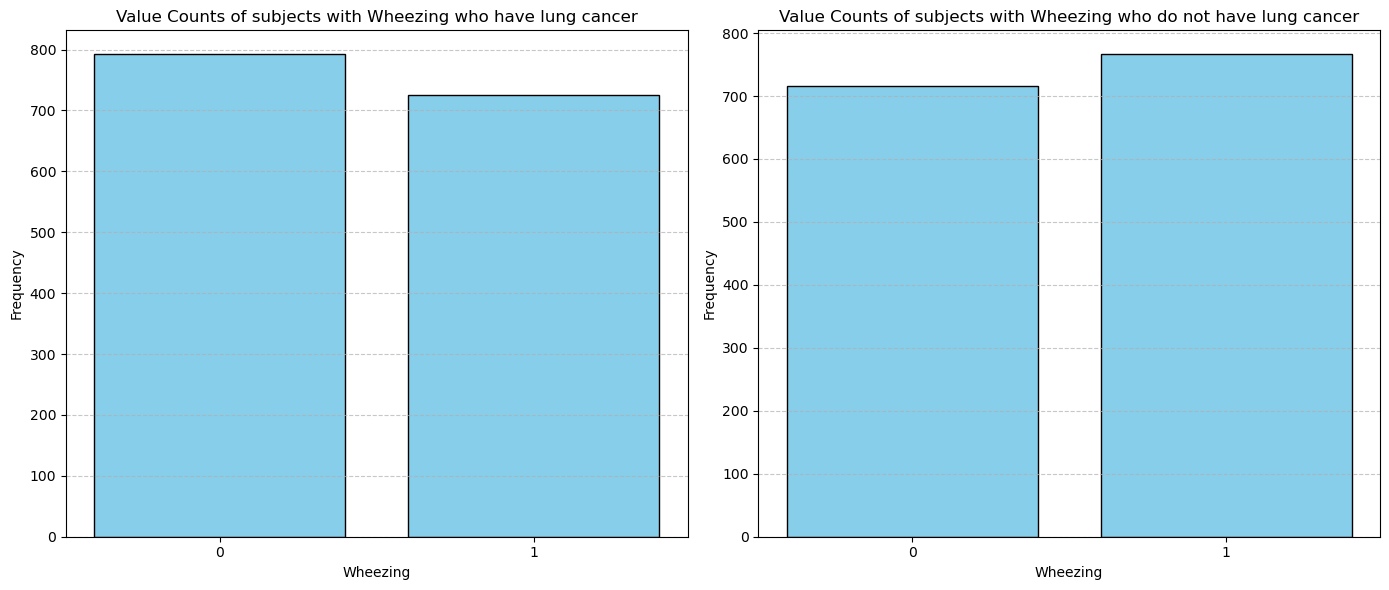

In [79]:
cancer_whezzing_value_counts = lung_cancer.WHEEZING.value_counts()
no_cancer_whezzing_value_counts = no_lung_cancer.WHEEZING.value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(cancer_whezzing_value_counts.index, cancer_whezzing_value_counts.values, edgecolor='black', color='skyblue')
axes[0].set_title('Value Counts of subjects with Wheezing who have lung cancer')
axes[0].set_xlabel('Wheezing')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(cancer_whezzing_value_counts.index)  # Ensure the x-ticks match the value counts
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(no_cancer_whezzing_value_counts.index, no_cancer_whezzing_value_counts.values, edgecolor='black', color='skyblue')
axes[1].set_title('Value Counts of subjects with Wheezing who do not have lung cancer')
axes[1].set_xlabel('Wheezing')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(no_cancer_whezzing_value_counts.index)  # Ensure the x-ticks match the value counts
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

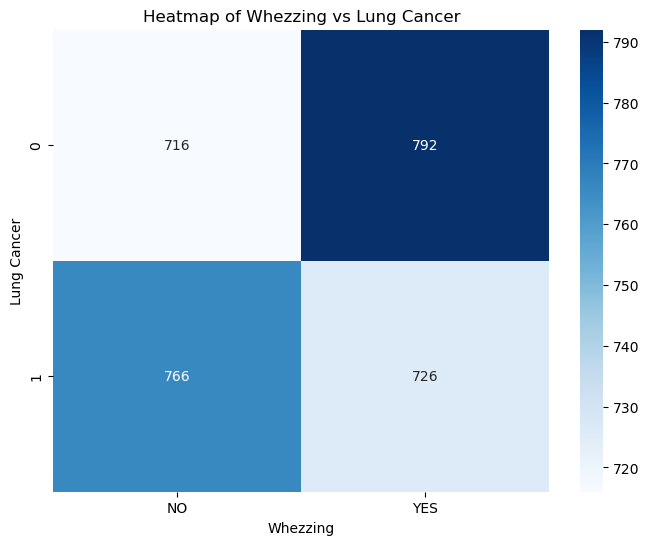

In [80]:
wheezing_cancer_table = pd.crosstab(data['WHEEZING'], data['LUNG_CANCER'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(wheezing_cancer_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Whezzing vs Lung Cancer')
plt.xlabel('Whezzing')
plt.ylabel('Lung Cancer')
plt.show()

## Alchohol Consumption vs Lung Cancer

In [81]:
lung_cancer.ALCOHOL_CONSUMING.value_counts()

ALCOHOL_CONSUMING
0    795
1    723
Name: count, dtype: int64

In [82]:
no_lung_cancer.ALCOHOL_CONSUMING.value_counts()

ALCOHOL_CONSUMING
1    751
0    731
Name: count, dtype: int64

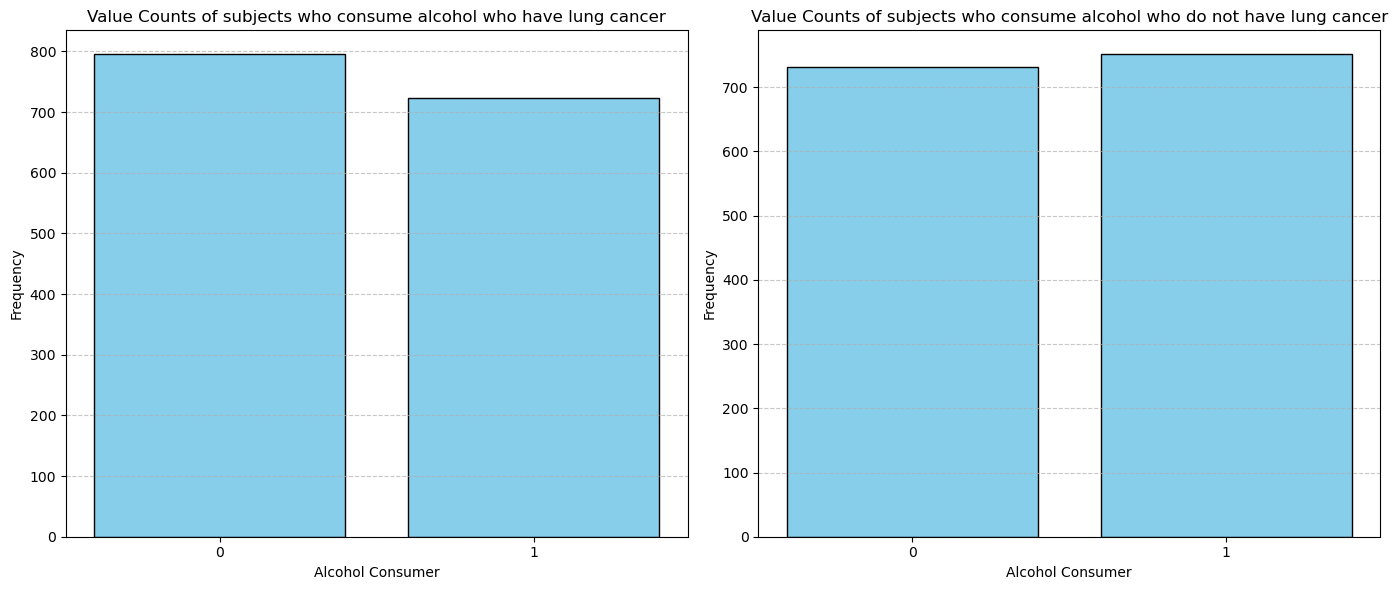

In [83]:
cancer_alch_value_counts = lung_cancer.ALCOHOL_CONSUMING.value_counts()
no_cancer_alch_value_counts = no_lung_cancer.ALCOHOL_CONSUMING.value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(cancer_alch_value_counts.index, cancer_alch_value_counts.values, edgecolor='black', color='skyblue')
axes[0].set_title('Value Counts of subjects who consume alcohol who have lung cancer')
axes[0].set_xlabel('Alcohol Consumer')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(no_cancer_alch_value_counts.index)  # Ensure the x-ticks match the value counts
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(no_cancer_alch_value_counts.index, no_cancer_alch_value_counts.values, edgecolor='black', color='skyblue')
axes[1].set_title('Value Counts of subjects who consume alcohol who do not have lung cancer')
axes[1].set_xlabel('Alcohol Consumer')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(no_cancer_alch_value_counts.index)  # Ensure the x-ticks match the value counts
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

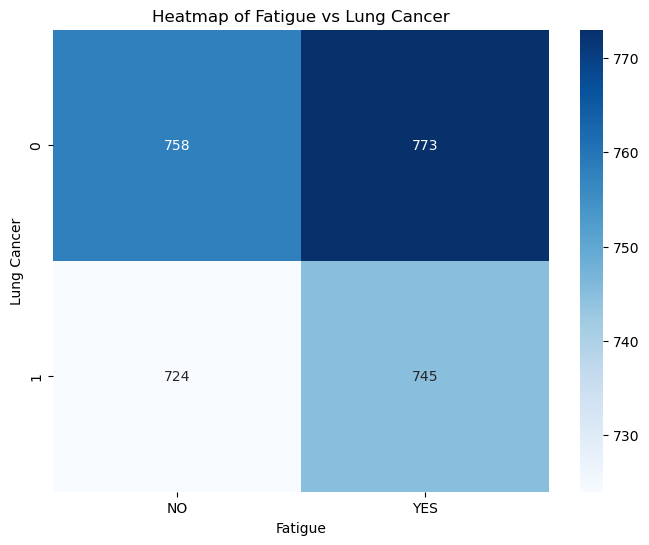

In [71]:
fatigue_cancer_table = pd.crosstab(data['FATIGUE'], data['LUNG_CANCER'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fatigue_cancer_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Fatigue vs Lung Cancer')
plt.xlabel('Fatigue')
plt.ylabel('Lung Cancer')
plt.show()

## Coughing vs Lung Cancer

In [68]:
lung_cancer.FATIGUE.value_counts()

FATIGUE
0    773
1    745
Name: count, dtype: int64

In [69]:
no_lung_cancer.FATIGUE.value_counts()

FATIGUE
0    758
1    724
Name: count, dtype: int64

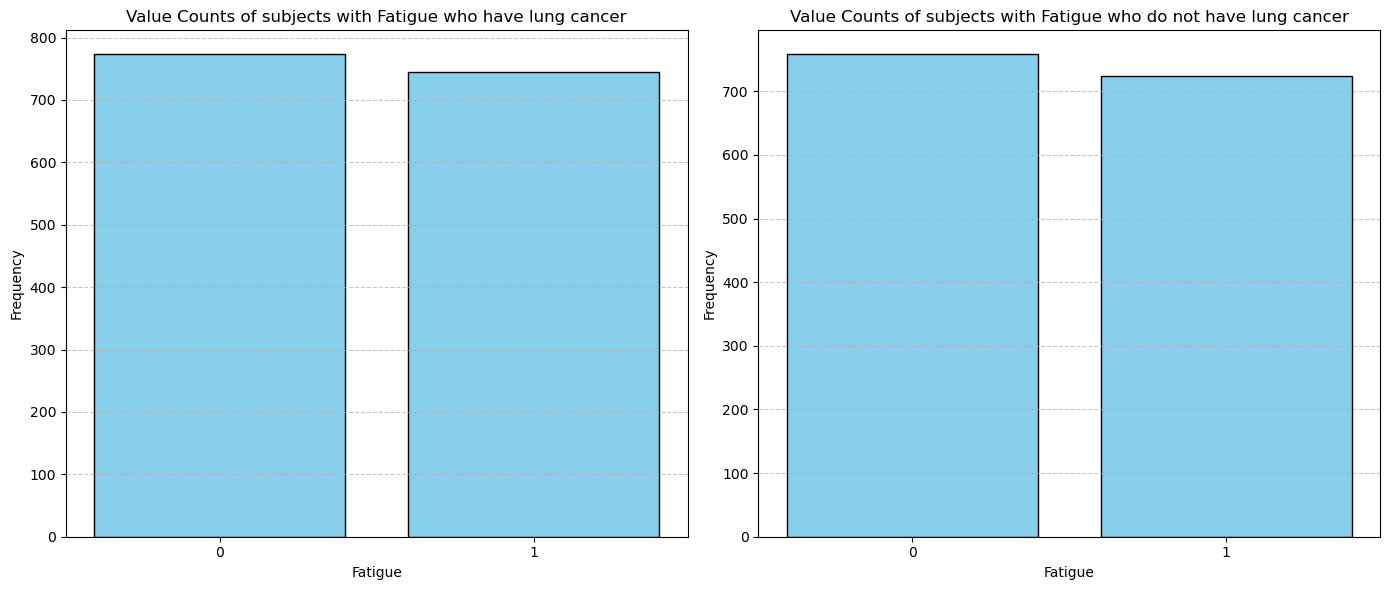

In [70]:
cancer_fatigue_value_counts = lung_cancer.FATIGUE.value_counts()
no_cancer_fatigue_value_counts = no_lung_cancer.FATIGUE.value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(cancer_fatigue_value_counts.index, cancer_fatigue_value_counts.values, edgecolor='black', color='skyblue')
axes[0].set_title('Value Counts of subjects with Fatigue who have lung cancer')
axes[0].set_xlabel('Fatigue')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(cancer_fatigue_value_counts.index)  # Ensure the x-ticks match the value counts
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(no_cancer_fatigue_value_counts.index, no_cancer_fatigue_value_counts.values, edgecolor='black', color='skyblue')
axes[1].set_title('Value Counts of subjects with Fatigue who do not have lung cancer')
axes[1].set_xlabel('Fatigue')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(no_cancer_fatigue_value_counts.index)  # Ensure the x-ticks match the value counts
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

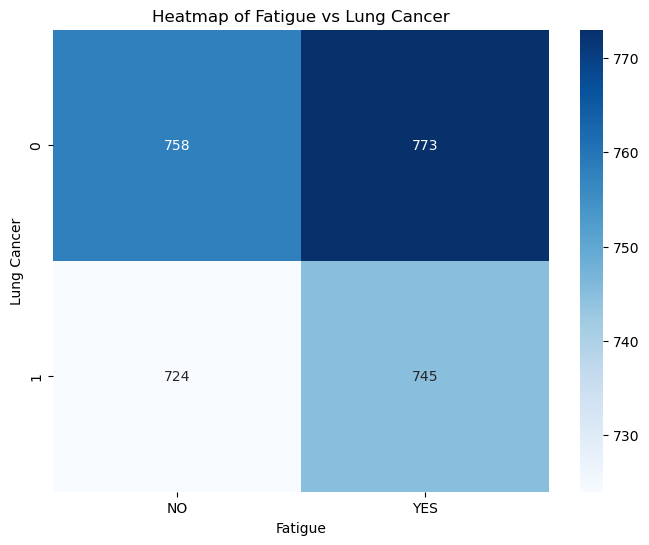

In [71]:
fatigue_cancer_table = pd.crosstab(data['FATIGUE'], data['LUNG_CANCER'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fatigue_cancer_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Fatigue vs Lung Cancer')
plt.xlabel('Fatigue')
plt.ylabel('Lung Cancer')
plt.show()

## Shortness of Breath vs Lung Cancer

In [68]:
lung_cancer.FATIGUE.value_counts()

FATIGUE
0    773
1    745
Name: count, dtype: int64

In [69]:
no_lung_cancer.FATIGUE.value_counts()

FATIGUE
0    758
1    724
Name: count, dtype: int64

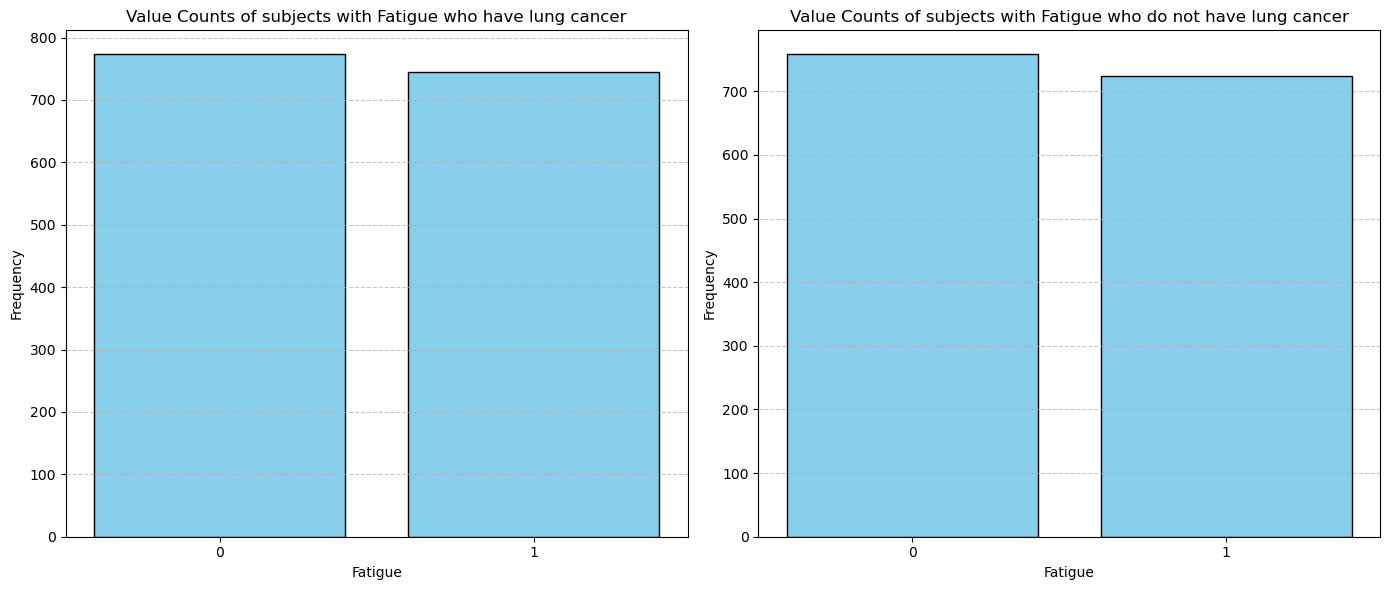

In [70]:
cancer_fatigue_value_counts = lung_cancer.FATIGUE.value_counts()
no_cancer_fatigue_value_counts = no_lung_cancer.FATIGUE.value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(cancer_fatigue_value_counts.index, cancer_fatigue_value_counts.values, edgecolor='black', color='skyblue')
axes[0].set_title('Value Counts of subjects with Fatigue who have lung cancer')
axes[0].set_xlabel('Fatigue')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(cancer_fatigue_value_counts.index)  # Ensure the x-ticks match the value counts
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(no_cancer_fatigue_value_counts.index, no_cancer_fatigue_value_counts.values, edgecolor='black', color='skyblue')
axes[1].set_title('Value Counts of subjects with Fatigue who do not have lung cancer')
axes[1].set_xlabel('Fatigue')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(no_cancer_fatigue_value_counts.index)  # Ensure the x-ticks match the value counts
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

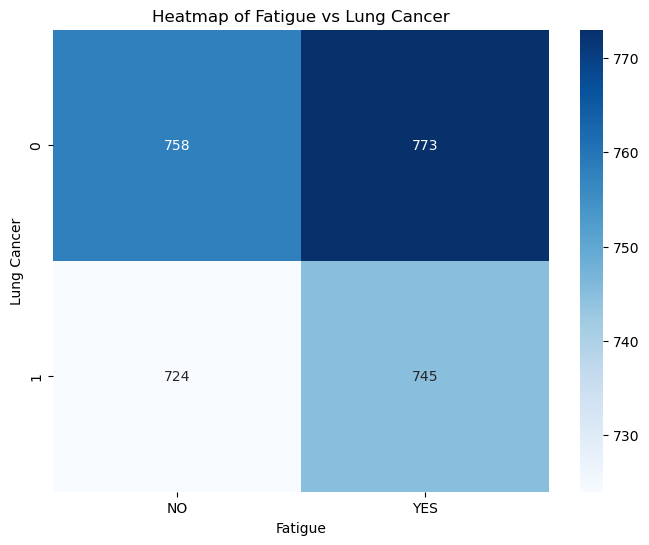

In [71]:
fatigue_cancer_table = pd.crosstab(data['FATIGUE'], data['LUNG_CANCER'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fatigue_cancer_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Fatigue vs Lung Cancer')
plt.xlabel('Fatigue')
plt.ylabel('Lung Cancer')
plt.show()

## Swallowing Difficulty vs Lung Cancer

In [68]:
lung_cancer.FATIGUE.value_counts()

FATIGUE
0    773
1    745
Name: count, dtype: int64

In [69]:
no_lung_cancer.FATIGUE.value_counts()

FATIGUE
0    758
1    724
Name: count, dtype: int64

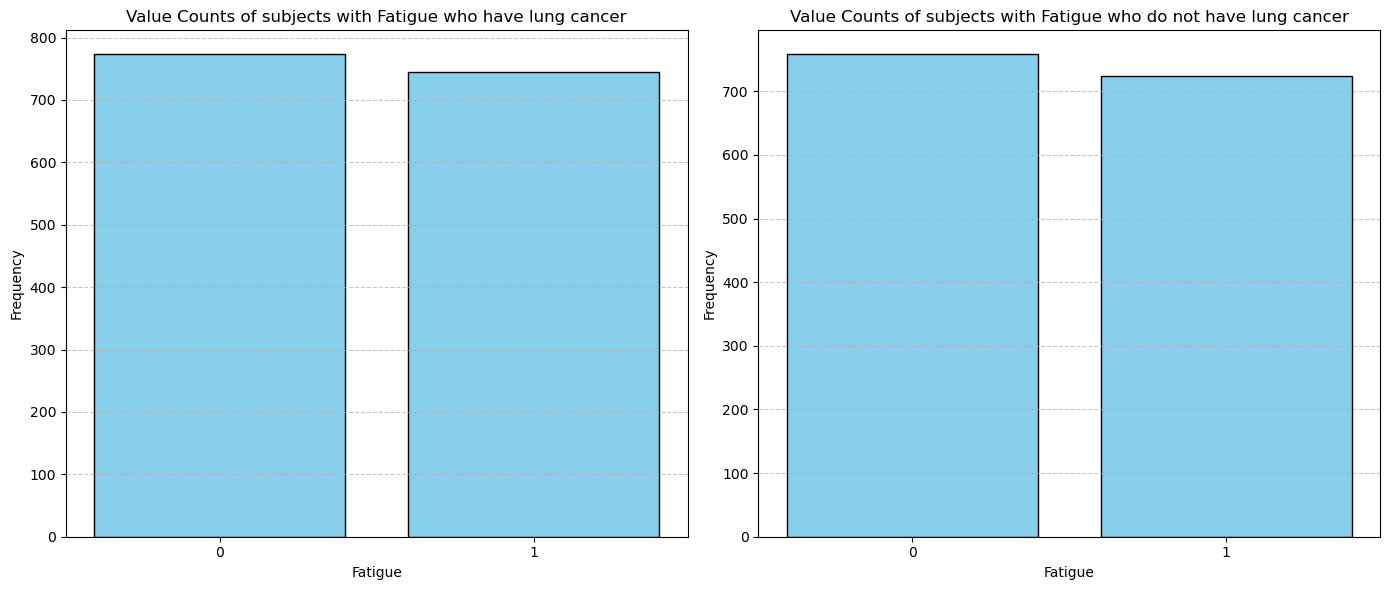

In [70]:
cancer_fatigue_value_counts = lung_cancer.FATIGUE.value_counts()
no_cancer_fatigue_value_counts = no_lung_cancer.FATIGUE.value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(cancer_fatigue_value_counts.index, cancer_fatigue_value_counts.values, edgecolor='black', color='skyblue')
axes[0].set_title('Value Counts of subjects with Fatigue who have lung cancer')
axes[0].set_xlabel('Fatigue')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(cancer_fatigue_value_counts.index)  # Ensure the x-ticks match the value counts
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(no_cancer_fatigue_value_counts.index, no_cancer_fatigue_value_counts.values, edgecolor='black', color='skyblue')
axes[1].set_title('Value Counts of subjects with Fatigue who do not have lung cancer')
axes[1].set_xlabel('Fatigue')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(no_cancer_fatigue_value_counts.index)  # Ensure the x-ticks match the value counts
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

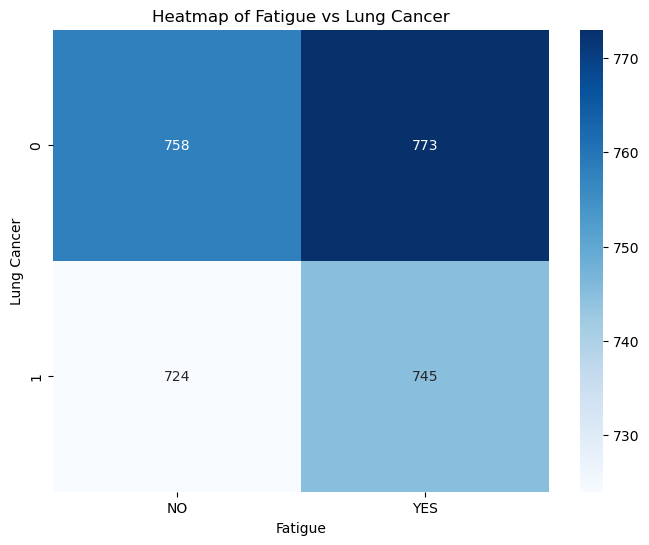

In [71]:
fatigue_cancer_table = pd.crosstab(data['FATIGUE'], data['LUNG_CANCER'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fatigue_cancer_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Fatigue vs Lung Cancer')
plt.xlabel('Fatigue')
plt.ylabel('Lung Cancer')
plt.show()

## Chest Pain vs Lung Cancer

In [68]:
lung_cancer.FATIGUE.value_counts()

FATIGUE
0    773
1    745
Name: count, dtype: int64

In [69]:
no_lung_cancer.FATIGUE.value_counts()

FATIGUE
0    758
1    724
Name: count, dtype: int64

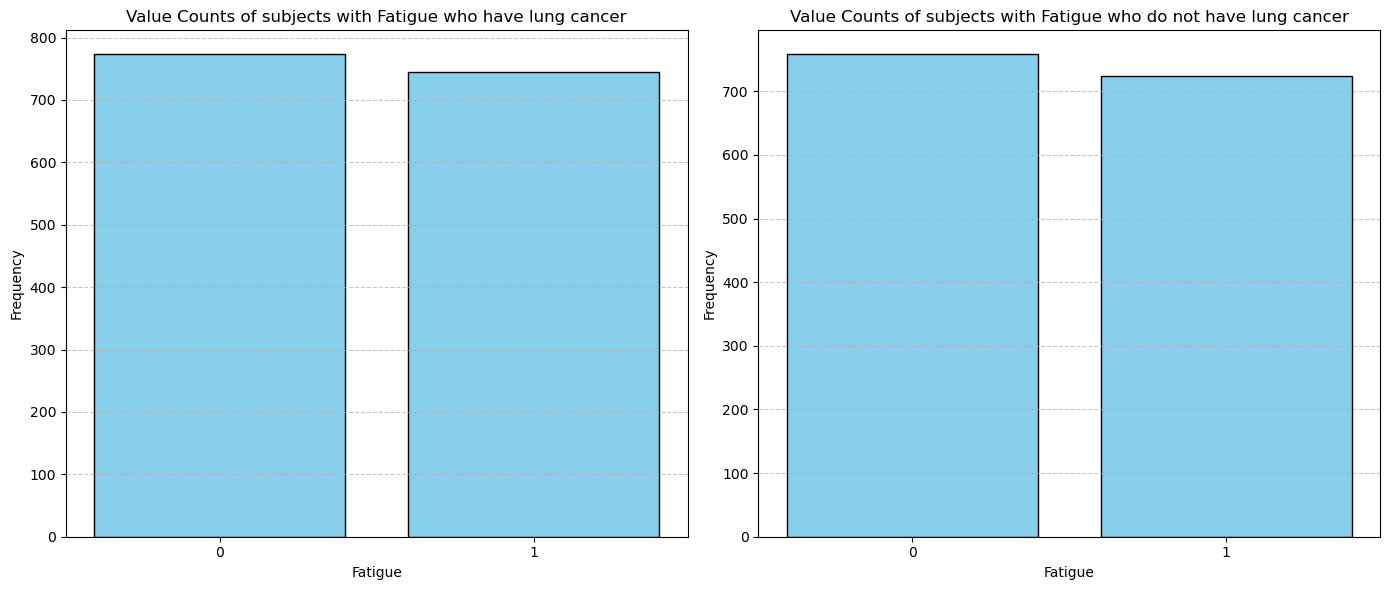

In [70]:
cancer_fatigue_value_counts = lung_cancer.FATIGUE.value_counts()
no_cancer_fatigue_value_counts = no_lung_cancer.FATIGUE.value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

axes[0].bar(cancer_fatigue_value_counts.index, cancer_fatigue_value_counts.values, edgecolor='black', color='skyblue')
axes[0].set_title('Value Counts of subjects with Fatigue who have lung cancer')
axes[0].set_xlabel('Fatigue')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(cancer_fatigue_value_counts.index)  # Ensure the x-ticks match the value counts
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

axes[1].bar(no_cancer_fatigue_value_counts.index, no_cancer_fatigue_value_counts.values, edgecolor='black', color='skyblue')
axes[1].set_title('Value Counts of subjects with Fatigue who do not have lung cancer')
axes[1].set_xlabel('Fatigue')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(no_cancer_fatigue_value_counts.index)  # Ensure the x-ticks match the value counts
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

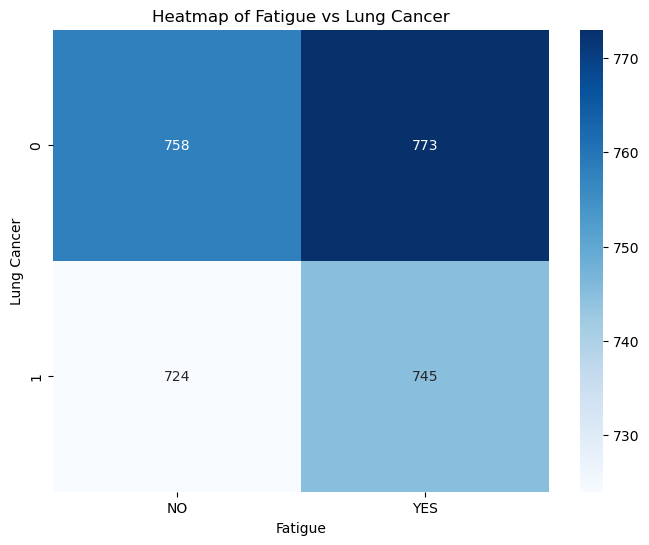

In [71]:
fatigue_cancer_table = pd.crosstab(data['FATIGUE'], data['LUNG_CANCER'])

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fatigue_cancer_table, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap of Fatigue vs Lung Cancer')
plt.xlabel('Fatigue')
plt.ylabel('Lung Cancer')
plt.show()

# Transfer Over

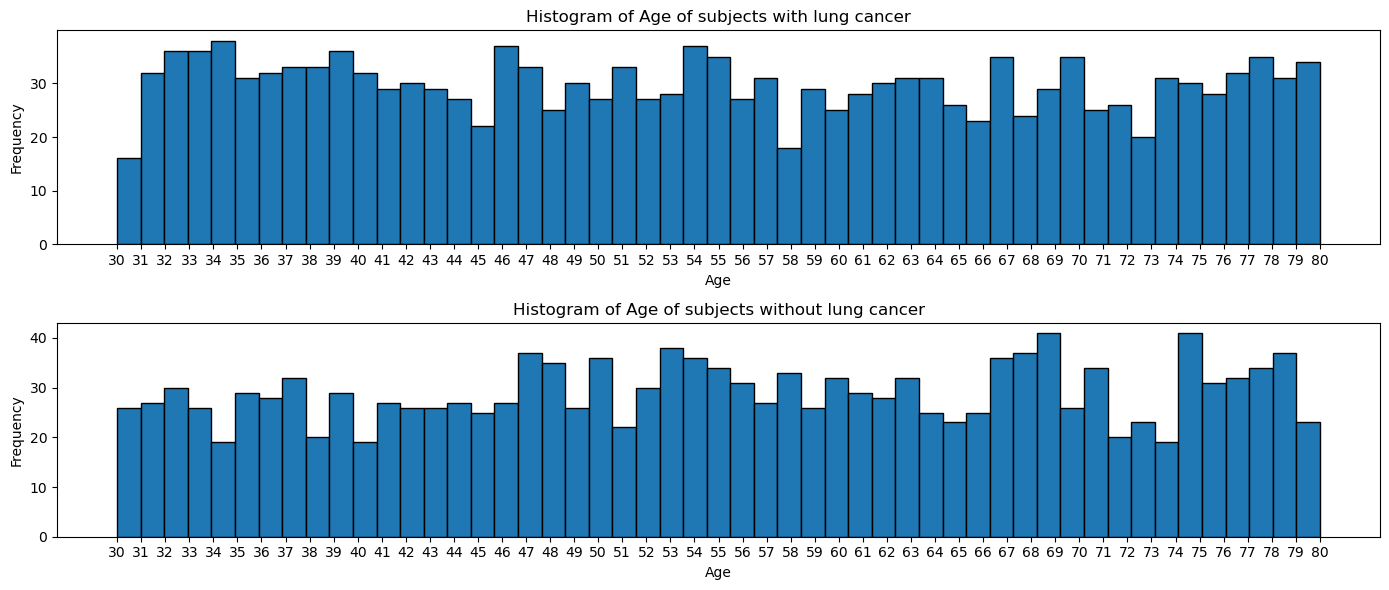

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 6))

data_age_range_cancer = lung_cancer.AGE.max() - lung_cancer.AGE.min() + 1
axes[0].hist(lung_cancer.AGE, bins=int(data_age_range_cancer), edgecolor='black')
axes[0].set_title('Histogram of Age of subjects with lung cancer')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(np.arange(min(lung_cancer.AGE), max(lung_cancer.AGE) + 1, 1))

data_age_range_no_cancer = no_lung_cancer.AGE.max() - no_lung_cancer.AGE.min() + 1
axes[1].hist(no_lung_cancer.AGE, bins=int(data_age_range_no_cancer), edgecolor='black')
axes[1].set_title('Histogram of Age of subjects without lung cancer')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(np.arange(min(no_lung_cancer.AGE), max(no_lung_cancer.AGE) + 1, 1))

plt.tight_layout()
plt.show()

This chart is useful for answering one of our questions of interest: At what age is someone more likely to develop lung cancer?  We see that the distribution between subjects with and those without lung cancer was fairly even.  However at the upper and lower limits of the distribution of ages we find that there were more people at the age of 30 who didn't have lung caner and there were more people at the age of 80 who did have lung cancer.  This is not enough to fully answer our question but it is a start.  If we run this through a learning model further insights may be made.

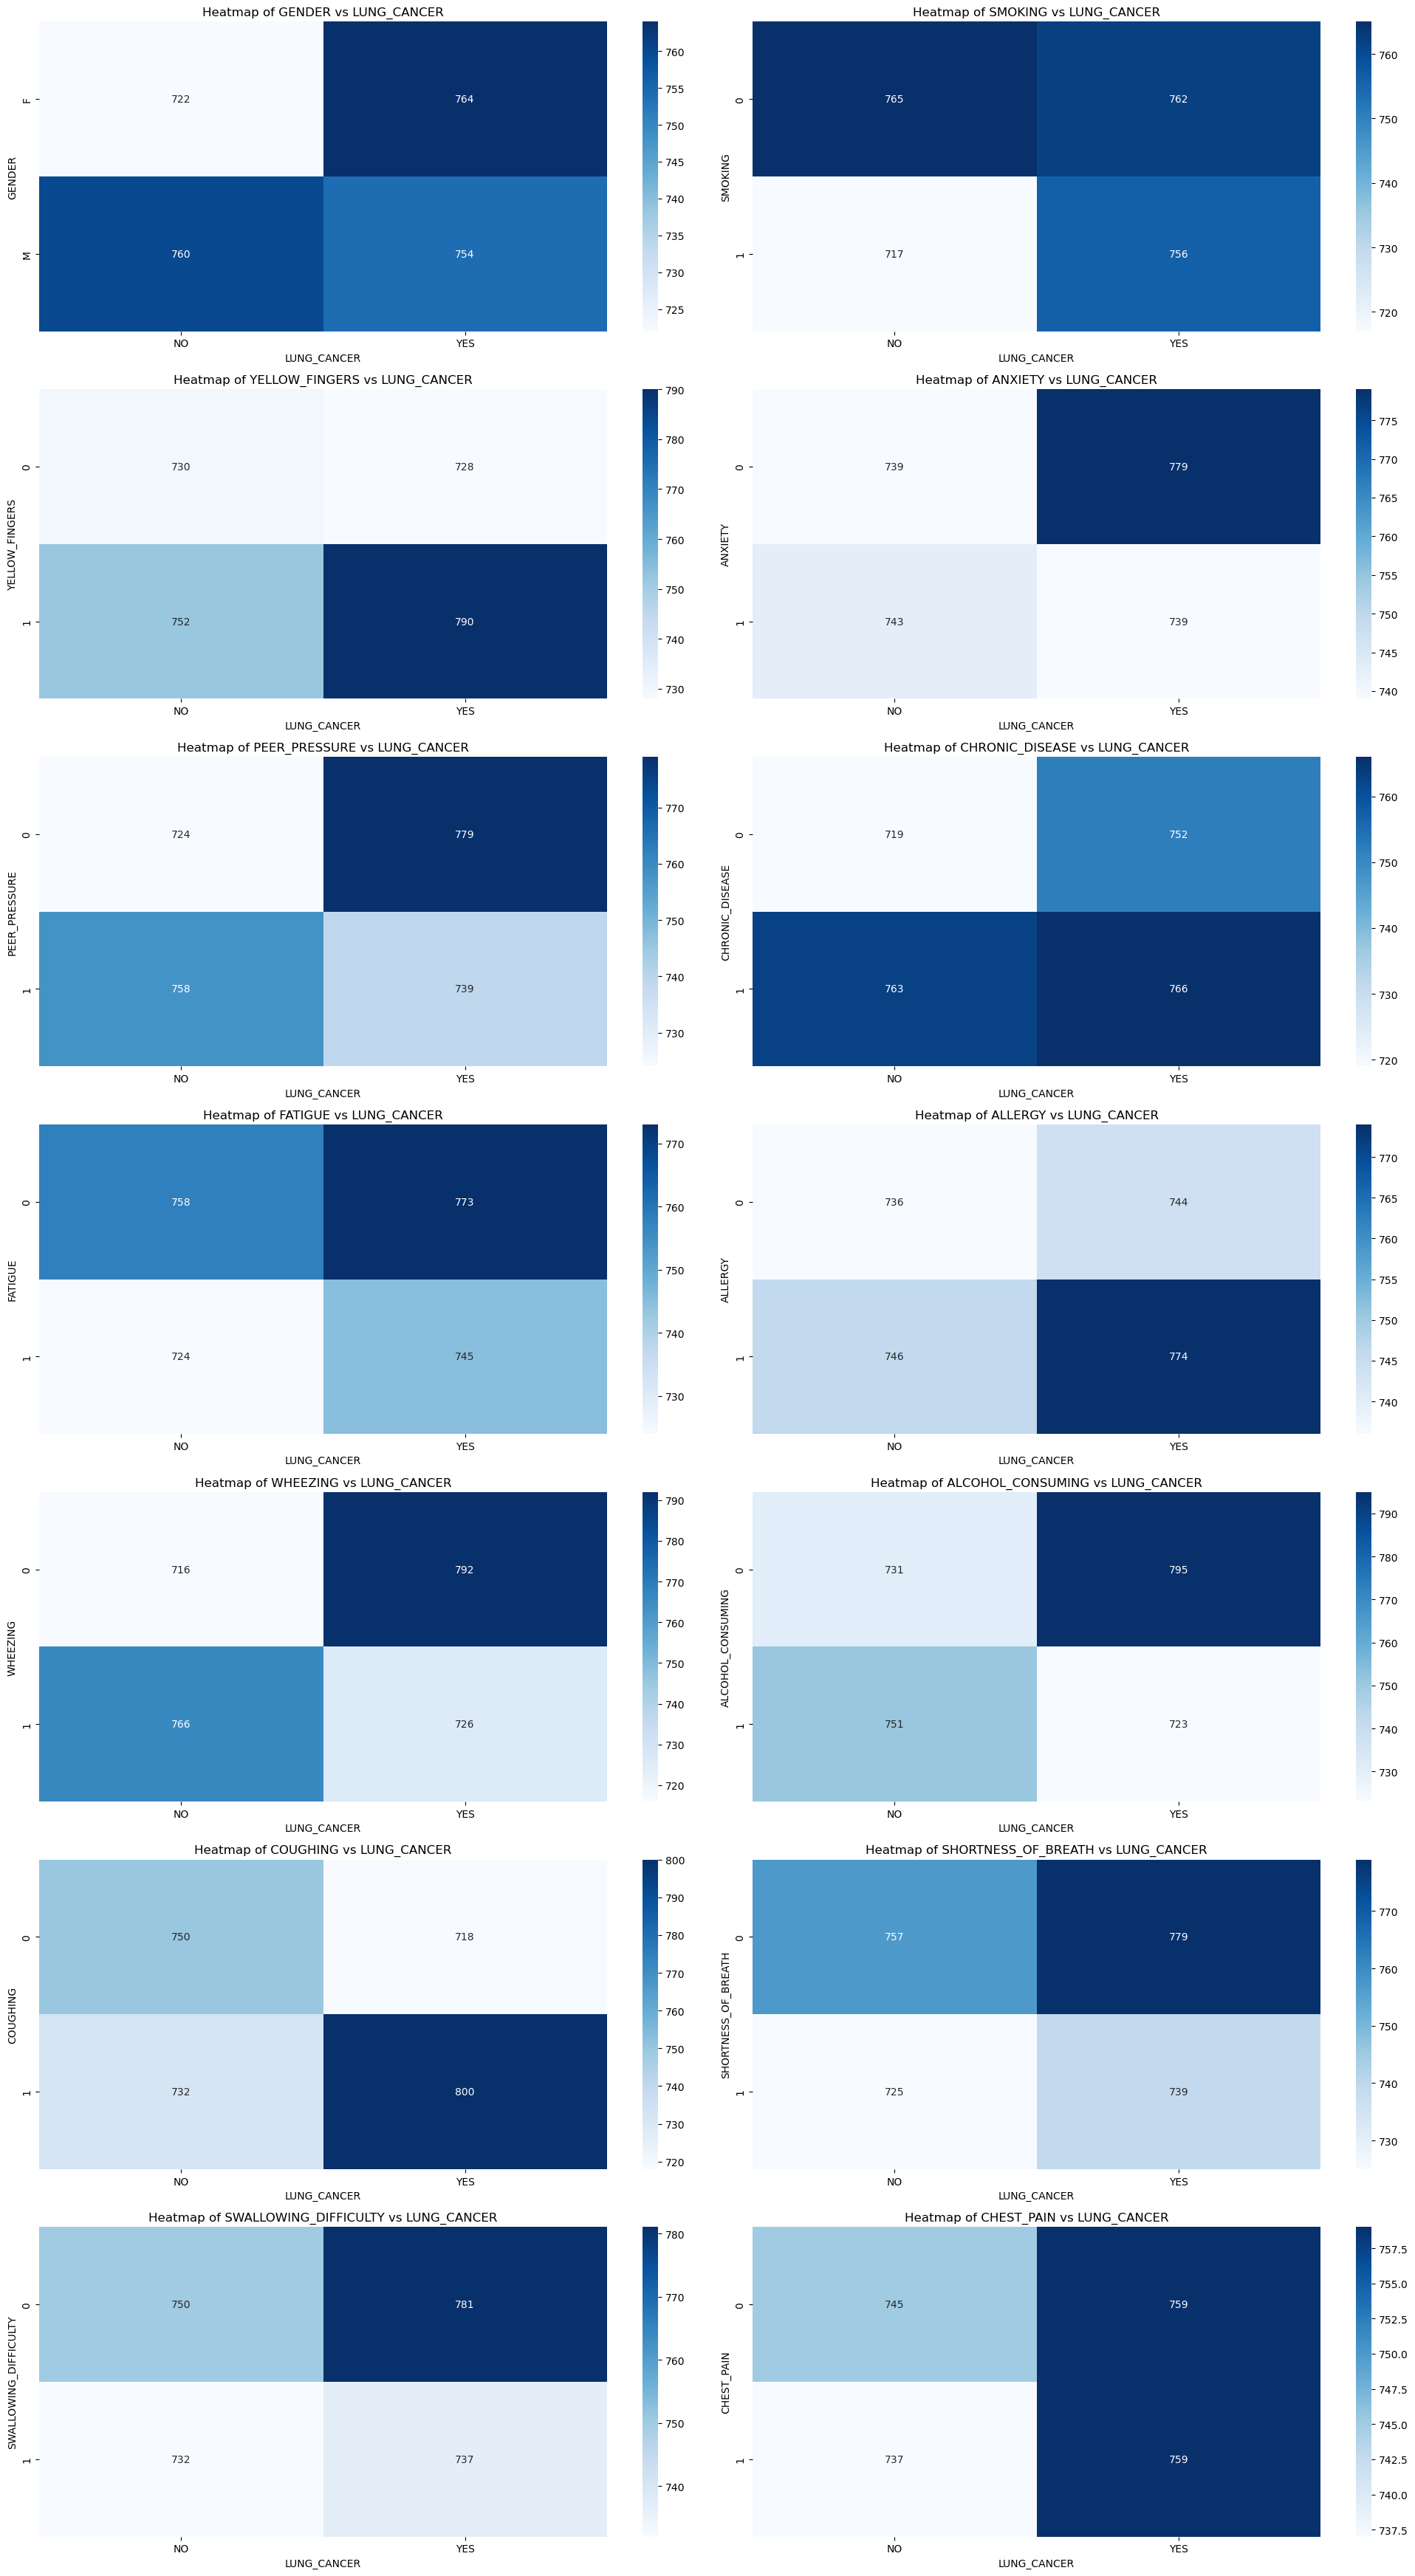

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target variable
target = 'LUNG_CANCER'

# List of features to compare with the target variable
features = ['GENDER','SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC_DISEASE','FATIGUE','ALLERGY','WHEEZING','ALCOHOL_CONSUMING','COUGHING','SHORTNESS_OF_BREATH','SWALLOWING_DIFFICULTY','CHEST_PAIN']

# Number of rows and columns for subplots
n_rows = 7
n_cols = 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 35))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot heatmaps for each feature compared to the target variable
for i, feature in enumerate(features):
    if i < len(axes):
        # Create a contingency table
        contingency_table = pd.crosstab(data[feature], data[target])

        # Plot the heatmap
        sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', ax=axes[i])
        axes[i].set_title(f'Heatmap of {feature} vs {target}')
        axes[i].set_xlabel(target)
        axes[i].set_ylabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()

# Questions of Interest
- What combinations of demographic features and health issues result in higher than nominal chances of the subject having lung cancer?
- Which health condition from the features set has the most impact on a subject having lung cancer?
- At what age is someone more likely to develop breast cancer?
- For the binary features do we have even splits across the dataset of true and false values?